In [155]:
# %pip install pyarrow
import numpy as np
import pandas as pd
import nflreadpy as nfl

## Load All Data

In [205]:
# Load current season play-by-play data
# pbp = nfl.load_pbp()

# Load player game-level stats for multiple seasons
player_stats = nfl.load_player_stats(list(range(2014, 2025)))

# Load all available team level stats
team_stats = nfl.load_team_stats(list(range(2014, 2025)))

# Load roster data for multiple seasons
roster = nfl.load_rosters(list(range(2014, 2025)))

# Load schedule data for multiple seasons
schedules = nfl.load_schedules(list(range(2014, 2025)))

# nflreadpy uses Polars instead of pandas. Convert to pandas if needed:
# pbp_pandas = pbp.to_pandas()
player_stats_pandas = player_stats.to_pandas()
team_stats_pandas = team_stats.to_pandas()
roster_pandas = roster.to_pandas()
schedules_pandas = schedules.to_pandas()

In [157]:
player_stats_pandas.columns

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'season', 'week', 'season_type',
       'team',
       ...
       'pat_missed', 'pat_blocked', 'pat_pct', 'gwfg_made', 'gwfg_att',
       'gwfg_missed', 'gwfg_blocked', 'gwfg_distance', 'fantasy_points',
       'fantasy_points_ppr'],
      dtype='object', length=114)

In [158]:
# view all columns that end in '_id' in player_stats_pandas
player_stats_pandas.filter(like='_id').head()

,player_id
0,00-0004091
1,00-0010346
2,00-0016919
3,00-0018227
4,00-0019536


In [159]:
np.unique(player_stats_pandas[['team']].values)

array(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LV',
       'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF',
       'TB', 'TEN', 'WAS'], dtype=object)

In [160]:
team_stats_pandas.columns

Index(['season', 'week', 'team', 'season_type', 'opponent_team', 'completions',
       'attempts', 'passing_yards', 'passing_tds', 'passing_interceptions',
       ...
       'pat_made', 'pat_att', 'pat_missed', 'pat_blocked', 'pat_pct',
       'gwfg_made', 'gwfg_att', 'gwfg_missed', 'gwfg_blocked',
       'gwfg_distance'],
      dtype='object', length=102)

In [161]:
team_stats_pandas.head()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,pat_made,pat_att,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance
0,2014,1,ARI,REG,LAC,24,37,304,2,0,...,0,0,0,0,NaN,0,0,0,0,0
1,2014,1,ATL,REG,NO,31,43,448,3,0,...,4,4,0,0,1.0,1,1,0,0,52
2,2014,1,BAL,REG,CIN,35,62,345,1,1,...,1,1,0,0,1.0,0,0,0,0,0
3,2014,1,BUF,REG,CHI,16,22,173,1,1,...,2,2,0,0,1.0,1,1,0,0,27
4,2014,1,CAR,REG,TB,24,34,230,2,0,...,2,2,0,0,1.0,0,0,0,0,0


In [162]:
# team_stats_pandas[team_stats_pandas['week'] == 18].tail(40)

In [206]:
roster_pandas.columns

Index(['season', 'team', 'position', 'depth_chart_position', 'jersey_number',
       'status', 'full_name', 'first_name', 'last_name', 'birth_date',
       'height', 'weight', 'college', 'gsis_id', 'espn_id', 'sportradar_id',
       'yahoo_id', 'rotowire_id', 'pff_id', 'pfr_id', 'fantasy_data_id',
       'sleeper_id', 'years_exp', 'headshot_url', 'ngs_position', 'week',
       'game_type', 'status_description_abbr', 'football_name', 'esb_id',
       'gsis_it_id', 'smart_id', 'entry_year', 'rookie_year', 'draft_club',
       'draft_number'],
      dtype='object')

In [164]:
# view all columns that end in '_id' in roster_pandas
roster_pandas.filter(like='_id').head()

,gsis_id,espn_id,sportradar_id,yahoo_id,rotowire_id,pff_id,pfr_id,fantasy_data_id,sleeper_id,esb_id,gsis_it_id,smart_id
0,00-0004091,1440,e5247e5f-c4af-4a9b-8c7c-da75ef7fbf8d,4269,994,422,None,5714,229,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988
1,00-0007091,1575,7d8eba61-208d-4d91-86cd-704ad05cb7f4,4416,949,408,HassMa00,1034,36,HAS536799,23636,32004841-5353-6799-a37b-f4bab15e4312
2,00-0010346,1428,aae6d92e-5f28-43ee-b0dc-522e80e99f76,4256,902,327,MannPe00,7328,294,MAN515097,23446,32004d41-4e51-5097-63c8-dfd9cac091f8
3,00-0016919,1097,9ecf8040-10f9-4a5c-92da-1b4d77bd6760,3727,395,226,None,3258,120,VIN196019,21213,32005649-4e19-6019-e626-0b58f9aa81e1
4,00-0018227,None,None,None,None,None,None,None,None,WOO661523,23449,3200574f-4f66-1523-6494-7f8d7d48fff1


In [165]:
roster_pandas['team'] = roster_pandas['team'].replace({'OAK': 'LV', 'SD': 'LAC', 'ARZ': 'ARI', 'BLT': 'BAL', 'HST': 'HOU', 'SL': 'LA', 'CLV': 'CLE'})

In [166]:
np.unique(roster_pandas[['team']].values)

array(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LV',
       'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF',
       'TB', 'TEN', 'WAS'], dtype=object)

In [167]:
schedules_pandas.columns

Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'ftn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium'],
      dtype='object')

In [168]:
# schedules_pandas.head(5)

# Updated team names in away_team and home_team columns where necessary
schedules_pandas['away_team'] = schedules_pandas['away_team'].replace({'OAK': 'LV', 'SD': 'LAC', 'STL': 'LA'})
schedules_pandas['home_team'] = schedules_pandas['home_team'].replace({'OAK': 'LV', 'SD': 'LAC', 'STL': 'LA'})

In [169]:
# get all unique team names in away_team and home_team columns
np.unique(schedules_pandas[['away_team', 'home_team']].values)

array(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LV',
       'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF',
       'TB', 'TEN', 'WAS'], dtype=object)

In [170]:
np.unique(team_stats_pandas[['team']].values)

array(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LV',
       'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF',
       'TB', 'TEN', 'WAS'], dtype=object)

## Team Game Stats and Schedule Transformations and Merging

In [171]:
## Merge Team Stats Data with Opponents Data from Schedules
def merge_team_stats_with_schedules(team_stats_df, schedules_df):
    """
    Merges team stats with their opponents based on the schedule.
    
    Parameters:
    team_stats_df (pd.DataFrame): DataFrame containing team stats with columns ['team', 'week', 'season'].
    schedules_df (pd.DataFrame): DataFrame containing schedule info with columns ['home_team', 'away_team', 'week', 'season'].
    
    Returns:
    pd.DataFrame: Merged DataFrame with team stats and opponent info.
    """
    # Combine team stats with schedule data to get opponent info
    home_team_stats_with_opponents = team_stats_df.merge(
        schedules_df,
        left_on=['team', 'week', 'season'],
        right_on=['home_team', 'week', 'season'],
        how='inner',
        suffixes=('_home', '')
    )

    away_team_stats_with_opponents = team_stats_df.merge(
        schedules_df,
        left_on=['team', 'week', 'season'],
        right_on=['away_team', 'week', 'season'],
        how='inner',
        suffixes=('', '_away')
    )

    # Combine home and away team stats with opponents into a single DataFrame, resetting the index so it's sequential
    combined_df = pd.concat([home_team_stats_with_opponents, away_team_stats_with_opponents], ignore_index=True)

    # Index based on season, than week, then team
    combined_df = combined_df.sort_values(by=['season', 'week', 'team']).reset_index(drop=True)
    
    return combined_df


# Combine home and away team stats with opponents into a single DataFrame, resetting the index so it's sequential
team_stats_with_schedules = merge_team_stats_with_schedules(team_stats_pandas, schedules_pandas)

# Index based on season, than week, then team
team_stats_with_schedules = team_stats_with_schedules.sort_values(by=['season', 'week', 'team']).reset_index(drop=True)

In [172]:
team_stats_with_schedules.head()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,2014,1,ARI,REG,LAC,24,37,304,2,0,...,NaN,00-0022942,00-0021429,Philip Rivers,Carson Palmer,Mike McCoy,Bruce Arians,Bill Vinovich,PHO00,University of Phoenix Stadium
1,2014,1,ATL,REG,NO,31,43,448,3,0,...,NaN,00-0020531,00-0026143,Drew Brees,Matt Ryan,Sean Payton,Mike Smith,Bill Leavy,ATL00,Georgia Dome
2,2014,1,BAL,REG,CIN,35,62,345,1,1,...,8.0,00-0027973,00-0026158,Andy Dalton,Joe Flacco,Marvin Lewis,John Harbaugh,Gene Stetatore,BAL00,M&T Bank Stadium
3,2014,1,BUF,REG,CHI,16,22,173,1,1,...,3.0,00-0030526,00-0024226,EJ Manuel,Jay Cutler,Doug Marrone,Marc Trestman,Brad Allen,CHI98,Soldier Field
4,2014,1,CAR,REG,TB,24,34,230,2,0,...,6.0,00-0023645,00-0021206,Derek Anderson,Josh McCown,Ron Rivera,Lovie Smith,Peter Morelli,TAM00,Raymond James Stadium


In [173]:
team_stats_with_schedules.columns

Index(['season', 'week', 'team', 'season_type', 'opponent_team', 'completions',
       'attempts', 'passing_yards', 'passing_tds', 'passing_interceptions',
       ...
       'wind', 'away_qb_id', 'home_qb_id', 'away_qb_name', 'home_qb_name',
       'away_coach', 'home_coach', 'referee', 'stadium_id', 'stadium'],
      dtype='object', length=146)

In [174]:
# Drop all columns except first 102 + 'away_team', 'away_score', 'home_team', 'home_score'
columns_to_keep = list(team_stats_with_schedules.columns[:102]) + ['away_team', 'away_score', 'home_team', 'home_score', 'gameday']
team_stats_with_schedules = team_stats_with_schedules[columns_to_keep]
team_stats_with_schedules.head()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,away_team,away_score,home_team,home_score,gameday
0,2014,1,ARI,REG,LAC,24,37,304,2,0,...,0,0,0,0,0,LAC,17,ARI,18,2014-09-08
1,2014,1,ATL,REG,NO,31,43,448,3,0,...,1,1,0,0,52,NO,34,ATL,37,2014-09-07
2,2014,1,BAL,REG,CIN,35,62,345,1,1,...,0,0,0,0,0,CIN,23,BAL,16,2014-09-07
3,2014,1,BUF,REG,CHI,16,22,173,1,1,...,1,1,0,0,27,BUF,23,CHI,20,2014-09-07
4,2014,1,CAR,REG,TB,24,34,230,2,0,...,0,0,0,0,0,CAR,20,TB,14,2014-09-07


In [175]:
# Function to create 'blocked_kicks' column and assign to opponent_team rows
def calculate_def_blocked_kicks(df):
    df['kicks_blocked'] = df['fg_blocked'] + df['pat_blocked']

    # Create a mapping of kicks_blocked by team, season, and week
    kicks_blocked_mapping = df.groupby(['team', 'season', 'week'])['kicks_blocked'].sum().to_dict()

    # Assign the opponent team's kicks_blocked to def_blocked_kicks
    df['def_blocked_kicks'] = df.apply(
        lambda row: kicks_blocked_mapping.get((row['opponent_team'], row['season'], row['week']), 0),
        axis=1
    )
    
    # drop the intermediate 'kicks_blocked' column if not needed
    df.drop(columns=['kicks_blocked'], inplace=True)

    return df

# Apply the function to the main DataFrame
new_team_stats_with_schedules = team_stats_with_schedules.copy()
new_team_stats_with_schedules = calculate_def_blocked_kicks(new_team_stats_with_schedules)

In [176]:
new_team_stats_with_schedules.iloc[32:64].head()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,away_team,away_score,home_team,home_score,gameday,def_blocked_kicks
32,2014,2,ARI,REG,NYG,14,29,167,0,0,...,0,0,0,0,ARI,25,NYG,14,2014-09-14,0
33,2014,2,ATL,REG,CIN,24,44,231,1,3,...,0,0,0,0,ATL,10,CIN,24,2014-09-14,0
34,2014,2,BAL,REG,PIT,21,29,166,2,0,...,0,0,0,0,PIT,6,BAL,26,2014-09-11,0
35,2014,2,BUF,REG,MIA,16,26,202,1,0,...,0,0,0,0,MIA,10,BUF,29,2014-09-14,0
36,2014,2,CAR,REG,DET,22,34,281,1,0,...,0,0,0,0,DET,7,CAR,24,2014-09-14,0


In [177]:
# Function to create 'points_allowed' column using 'away_team', 'away_score', 'home_team', 'home_score'
def add_points_allowed(df):
    df['points_allowed'] = df.apply(
        lambda row: row['home_score'] if row['team'] == row['away_team'] else row['away_score'],
        axis=1
    )
    # Drop the intermediate columns used for calculation
    df.drop(columns=['away_team', 'away_score', 'home_team', 'home_score'], inplace=True)
    
    return df

final_team_stats_with_schedules = new_team_stats_with_schedules.copy()
final_team_stats_with_schedules = add_points_allowed(final_team_stats_with_schedules)

In [178]:
final_team_stats_with_schedules.head()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,gameday,def_blocked_kicks,points_allowed
0,2014,1,ARI,REG,LAC,24,37,304,2,0,...,0,NaN,0,0,0,0,0,2014-09-08,0,17
1,2014,1,ATL,REG,NO,31,43,448,3,0,...,0,1.0,1,1,0,0,52,2014-09-07,0,34
2,2014,1,BAL,REG,CIN,35,62,345,1,1,...,0,1.0,0,0,0,0,0,2014-09-07,1,23
3,2014,1,BUF,REG,CHI,16,22,173,1,1,...,0,1.0,1,1,0,0,27,2014-09-07,0,20
4,2014,1,CAR,REG,TB,24,34,230,2,0,...,0,1.0,0,0,0,0,0,2014-09-07,0,14


In [179]:
# Function to use final_team_stats_with_schedules to create all 'team' stats dfs by 'season' i.e. det_2021_df, kc_2022_df, etc. 
def create_team_stats_dfs(final_team_stats_with_schedules):
    team_stats_dfs = {}
    for team_abbr in final_team_stats_with_schedules['team'].unique():
        for season in final_team_stats_with_schedules['season'].unique():
            team_stats_dfs[f"{team_abbr.lower()}_stats_{season}_df"] = final_team_stats_with_schedules[
                (final_team_stats_with_schedules['team'] == team_abbr) & (final_team_stats_with_schedules['season'] == season)
            ]
    return team_stats_dfs

individual_team_stats_dfs = create_team_stats_dfs(final_team_stats_with_schedules)

In [180]:
individual_team_stats_dfs.keys()

dict_keys(['ari_stats_2014_df', 'ari_stats_2015_df', 'ari_stats_2016_df', 'ari_stats_2017_df', 'ari_stats_2018_df', 'ari_stats_2019_df', 'ari_stats_2020_df', 'ari_stats_2021_df', 'ari_stats_2022_df', 'ari_stats_2023_df', 'ari_stats_2024_df', 'atl_stats_2014_df', 'atl_stats_2015_df', 'atl_stats_2016_df', 'atl_stats_2017_df', 'atl_stats_2018_df', 'atl_stats_2019_df', 'atl_stats_2020_df', 'atl_stats_2021_df', 'atl_stats_2022_df', 'atl_stats_2023_df', 'atl_stats_2024_df', 'bal_stats_2014_df', 'bal_stats_2015_df', 'bal_stats_2016_df', 'bal_stats_2017_df', 'bal_stats_2018_df', 'bal_stats_2019_df', 'bal_stats_2020_df', 'bal_stats_2021_df', 'bal_stats_2022_df', 'bal_stats_2023_df', 'bal_stats_2024_df', 'buf_stats_2014_df', 'buf_stats_2015_df', 'buf_stats_2016_df', 'buf_stats_2017_df', 'buf_stats_2018_df', 'buf_stats_2019_df', 'buf_stats_2020_df', 'buf_stats_2021_df', 'buf_stats_2022_df', 'buf_stats_2023_df', 'buf_stats_2024_df', 'car_stats_2014_df', 'car_stats_2015_df', 'car_stats_2016_df', 'c

In [181]:
# Example: Access the Detroit Lions 2021 DataFrame
det_stats_2021_df = individual_team_stats_dfs.get('det_stats_2021_df')
det_stats_2021_df.head()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,gameday,def_blocked_kicks,points_allowed
3752,2021,1,DET,REG,SF,38,57,338,3,1,...,0,1.0,0,0,0,0,0,2021-09-12,0,41
3784,2021,2,DET,REG,GB,26,36,246,2,1,...,0,1.0,0,0,0,0,0,2021-09-20,0,35
3816,2021,3,DET,REG,BAL,22,31,217,0,0,...,0,1.0,0,0,0,0,0,2021-09-26,0,19
3848,2021,4,DET,REG,CHI,24,38,299,2,0,...,0,1.0,0,0,0,0,0,2021-10-03,0,24
3880,2021,5,DET,REG,MIN,21,35,203,0,1,...,0,NaN,0,0,0,0,0,2021-10-10,0,19


In [ ]:
# Function to combine all 2021 week 1 stats for each team in a single dataframe
def combine_team_weekly_stats(team_stats_dfs, week=1, season=2021):
    combined_df = pd.DataFrame()
    for team_abbr in team_stats_pandas['team'].unique():
        team_df = team_stats_dfs.get(f"{team_abbr.lower()}_stats_{season}_df")
        if team_df is not None:
            week_df = team_df[team_df['week'] == week]
            combined_df = pd.concat([combined_df, week_df], ignore_index=True)
    return combined_df

# Function to loop through team_stats_dfs and create combined dfs for each week and season
def combine_all_team_weekly_stats(team_stats_dfs, weeks=range(1, 19), seasons=range(2014, 2025)):
    all_combined_dfs = {}
    for season in seasons:
        for week in weeks:
            combined_df = combine_team_weekly_stats(team_stats_dfs, week=week, season=season)
            all_combined_dfs[f"combined_{season}_week{week}_df"] = combined_df
    return all_combined_dfs

combined_weekly_dfs = combine_all_team_weekly_stats(individual_team_stats_dfs)

dict_keys(['combined_2014_week1_df', 'combined_2014_week2_df', 'combined_2014_week3_df', 'combined_2014_week4_df', 'combined_2014_week5_df', 'combined_2014_week6_df', 'combined_2014_week7_df', 'combined_2014_week8_df', 'combined_2014_week9_df', 'combined_2014_week10_df', 'combined_2014_week11_df', 'combined_2014_week12_df', 'combined_2014_week13_df', 'combined_2014_week14_df', 'combined_2014_week15_df', 'combined_2014_week16_df', 'combined_2014_week17_df', 'combined_2014_week18_df', 'combined_2015_week1_df', 'combined_2015_week2_df', 'combined_2015_week3_df', 'combined_2015_week4_df', 'combined_2015_week5_df', 'combined_2015_week6_df', 'combined_2015_week7_df', 'combined_2015_week8_df', 'combined_2015_week9_df', 'combined_2015_week10_df', 'combined_2015_week11_df', 'combined_2015_week12_df', 'combined_2015_week13_df', 'combined_2015_week14_df', 'combined_2015_week15_df', 'combined_2015_week16_df', 'combined_2015_week17_df', 'combined_2015_week18_df', 'combined_2016_week1_df', 'combined

In [183]:
combined_weekly_dfs.keys()

dict_keys(['combined_2014_week1_df', 'combined_2014_week2_df', 'combined_2014_week3_df', 'combined_2014_week4_df', 'combined_2014_week5_df', 'combined_2014_week6_df', 'combined_2014_week7_df', 'combined_2014_week8_df', 'combined_2014_week9_df', 'combined_2014_week10_df', 'combined_2014_week11_df', 'combined_2014_week12_df', 'combined_2014_week13_df', 'combined_2014_week14_df', 'combined_2014_week15_df', 'combined_2014_week16_df', 'combined_2014_week17_df', 'combined_2014_week18_df', 'combined_2015_week1_df', 'combined_2015_week2_df', 'combined_2015_week3_df', 'combined_2015_week4_df', 'combined_2015_week5_df', 'combined_2015_week6_df', 'combined_2015_week7_df', 'combined_2015_week8_df', 'combined_2015_week9_df', 'combined_2015_week10_df', 'combined_2015_week11_df', 'combined_2015_week12_df', 'combined_2015_week13_df', 'combined_2015_week14_df', 'combined_2015_week15_df', 'combined_2015_week16_df', 'combined_2015_week17_df', 'combined_2015_week18_df', 'combined_2016_week1_df', 'combined

In [184]:
combined_2021_week1_df = combined_weekly_dfs['combined_2021_week2_df']
combined_2021_week1_df.head()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,gameday,def_blocked_kicks,points_allowed
0,2021,2,ARI,REG,MIN,29,36,400,3,2,...,0,1.000000,0,0,0,0,0,2021-09-19,0,33
1,2021,2,ATL,REG,TB,35,48,300,2,3,...,0,1.000000,0,0,0,0,0,2021-09-19,0,48
2,2021,2,BAL,REG,KC,18,26,239,1,2,...,0,1.000000,0,0,0,0,0,2021-09-19,0,35
3,2021,2,BUF,REG,MIA,17,33,179,2,1,...,0,1.000000,0,0,0,0,0,2021-09-19,0,0
4,2021,2,CAR,REG,NO,26,38,305,2,1,...,0,0.666667,0,0,0,0,0,2021-09-19,0,7


In [185]:
# Map and calculate fantasy points for defensive & special-teams stats
def_st_list = ['def_sacks', 'def_interceptions', 'fumble_recovery_opp', 'fumble_recovery_tds', 'def_safeties', 'def_tds', 'def_blocked_kicks', 'special_teams_tds', 'points_allowed']

def calculate_def_st_fp(df):
    """Standard scoring:
    · Kickoff Return TD = 6pts
    · Punt Return TD = 6pts
    · Interception Return TD = 6pts
    · Fumble Return TD = 6pts
    · Blocked Punt or FG return for TD = 6pts
    · Each Interception = 2pts
    · Each Fumble Recovered = 2pts
    · Blocked Punt, PAT or FG = 2pts
    · Each Safety = 2pts
    · Each Sack = 1pts
    · 0 points allowed = 5pts
    · 1-6 points allowed = 4pts
    · 7-13 points allowed = 3pts
    · 14-17 points allowed = 1pts
    · 18-27 points allowed = 0pts
    · 28-34 points allowed = -1pts
    · 35-45 points allowed = -3pts
    · 46+ points allowed = -5pts

    Args:
        df (pd.DataFrame): DataFrame containing defensive and special teams stats

    Returns:
        pd.DataFrame: DataFrame with an additional 'def_st_sum' column representing the summed fantasy points
    """
    def_st_fp_df = df.copy()

    # Apply standard scoring rules
    def_st_fp_df['fp_def_st'] = (
        def_st_fp_df['def_sacks'] * 1 +
        def_st_fp_df['def_interceptions'] * 2 +
        def_st_fp_df['fumble_recovery_opp'] * 2 +
        def_st_fp_df['fumble_recovery_tds'] * 6 +
        def_st_fp_df['def_safeties'] * 2 +
        def_st_fp_df['def_tds'] * 6 +
        def_st_fp_df['def_blocked_kicks'] * 2 +
        def_st_fp_df['special_teams_tds'] * 6 +
        def_st_fp_df['points_allowed'].apply(
            lambda x: 5 if x == 0 else
                      4 if 1 <= x <= 6 else
                      3 if 7 <= x <= 13 else
                      1 if 14 <= x <= 17 else
                      0 if 18 <= x <= 27 else
                      -1 if 28 <= x <= 34 else
                      -3 if 35 <= x <= 45 else
                      -5
        )
    )

    # Drop individual defensive stat columns if needed
    # def_st_ff_score_df = def_st_ff_score_df[first_five_columns + ['def_st_ffs']]

    # Rank teams based on 'fp_def_st' and order from highest to lowest
    def_st_fp_df['fp_def_st_rank'] = def_st_fp_df['fp_def_st'].rank(ascending=False)
    def_st_fp_df.sort_values('fp_def_st_rank')

    return def_st_fp_df

# Function to loop through combined_weekly_dfs and calculate def_st_ffs for each week and season
def calculate_all_def_st_ff_points(combined_weekly_dfs):
    all_def_st_fp_dfs = {}
    for key, df in combined_weekly_dfs.items():
        all_def_st_fp_dfs[key] = calculate_def_st_fp(df)
    return all_def_st_fp_dfs

# Calculate all defensive and special teams fantasy points for each week and season
all_def_st_ff_dfs = calculate_all_def_st_ff_points(combined_weekly_dfs)

In [187]:
all_def_st_ff_dfs.keys()

dict_keys(['combined_2014_week1_df', 'combined_2014_week2_df', 'combined_2014_week3_df', 'combined_2014_week4_df', 'combined_2014_week5_df', 'combined_2014_week6_df', 'combined_2014_week7_df', 'combined_2014_week8_df', 'combined_2014_week9_df', 'combined_2014_week10_df', 'combined_2014_week11_df', 'combined_2014_week12_df', 'combined_2014_week13_df', 'combined_2014_week14_df', 'combined_2014_week15_df', 'combined_2014_week16_df', 'combined_2014_week17_df', 'combined_2014_week18_df', 'combined_2015_week1_df', 'combined_2015_week2_df', 'combined_2015_week3_df', 'combined_2015_week4_df', 'combined_2015_week5_df', 'combined_2015_week6_df', 'combined_2015_week7_df', 'combined_2015_week8_df', 'combined_2015_week9_df', 'combined_2015_week10_df', 'combined_2015_week11_df', 'combined_2015_week12_df', 'combined_2015_week13_df', 'combined_2015_week14_df', 'combined_2015_week15_df', 'combined_2015_week16_df', 'combined_2015_week17_df', 'combined_2015_week18_df', 'combined_2016_week1_df', 'combined

In [189]:
combined_2021_week18_df_def_st_ffs = all_def_st_ff_dfs['combined_2021_week18_df']
combined_2021_week18_df_def_st_ffs.sort_values('fp_def_st_rank').head()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,gameday,def_blocked_kicks,points_allowed,fp_def_st,fp_def_st_rank
19,2021,18,MIA,REG,NE,15,22,109,1,0,...,0,0,0,0,0,2022-01-09,0,24,20.0,1.0
20,2021,18,MIN,REG,CHI,14,22,250,3,0,...,0,0,0,0,0,2022-01-09,0,17,18.0,2.0
31,2021,18,WAS,REG,NYG,9,18,120,0,0,...,0,0,0,0,0,2022-01-09,0,7,17.0,3.0
14,2021,18,JAX,REG,IND,23,32,223,2,0,...,0,0,0,0,0,2022-01-09,0,11,13.0,4.0
26,2021,18,PIT,REG,BAL,30,44,244,1,1,...,1,1,0,0,36,2022-01-09,0,13,12.0,5.5


In [190]:
# Function to re-combine all defensive and special teams fantasy points DataFrames into a single DataFrame
def combine_all_def_st_ff_dfs(all_def_st_ff_dfs):
    combined_df = pd.concat(all_def_st_ff_dfs.values(), ignore_index=True)
    return combined_df

# Combine all defensive and special teams fantasy points DataFrames
final_team_stats_schedule_df = combine_all_def_st_ff_dfs(all_def_st_ff_dfs)

# Drop all columns except first 5 and specific columns 'fp_alwd_def_st' and 'fp_alwd_def_st_rank'
first_five_columns = final_team_stats_schedule_df.columns[:5].tolist()
final_team_stats_schedule_df = final_team_stats_schedule_df[first_five_columns + ['fp_def_st', 'fp_def_st_rank', 'gameday']]
final_team_stats_schedule_df

,season,week,team,season_type,opponent_team,fp_def_st,fp_def_st_rank,gameday
0,2014,1,ARI,REG,LAC,3.0,21.5,2014-09-08
1,2014,1,ATL,REG,NO,3.0,21.5,2014-09-07
2,2014,1,BAL,REG,CIN,2.0,25.0,2014-09-07
3,2014,1,BUF,REG,CHI,8.0,9.5,2014-09-07
4,2014,1,CAR,REG,TB,10.0,6.5,2014-09-07
...,...,...,...,...,...,...,...,...
5813,2024,18,SEA,REG,LA,5.0,12.0,2025-01-05
5814,2024,18,SF,REG,ARI,-5.0,32.0,2025-01-05
5815,2024,18,TB,REG,NO,2.0,22.5,2025-01-05
5816,2024,18,TEN,REG,HOU,3.0,18.5,2025-01-05


In [192]:
# Function to calculate 1, 3, 5, and 8 game rolling averages for fp_def_st and fp_def_st_rank in final_team_stats_schedule_df
def calculate_df_st_rolling_averages(df):
    df = df.copy()
    # Sort by team, season, and week to ensure chronological order per player
    df = df.sort_values(['team', 'season', 'week'])

    for col in ['fp_def_st', 'fp_def_st_rank']:
        for window in [1, 3, 5, 8]:
            df[f'{col}_r_avg_{window}'] = df.groupby(['team', 'season'])[col].transform(lambda x: x.rolling(window, min_periods=1).mean()).round(2)

    # 1-week lag for all rolling averages(fp_def_st_r_avg_1, fp_def_st_r_avg_3, etc. and fp_def_st_rank_r_avg_1, fp_def_st_rank_r_avg_3, etc.)
    for window in [1, 3, 5, 8]:
        for col in ['fp_def_st', 'fp_def_st_rank']:
            df[f'{col}_r_avg_{window}_lag_1'] = df.groupby('team')[f'{col}_r_avg_{window}'].shift(1)
            
    return df

final_team_stats_schedule_df = calculate_df_st_rolling_averages(final_team_stats_schedule_df)
final_team_stats_schedule_df

,season,week,team,season_type,opponent_team,fp_def_st,fp_def_st_rank,gameday,fp_def_st_r_avg_1,fp_def_st_r_avg_3,...,fp_def_st_rank_r_avg_5,fp_def_st_rank_r_avg_8,fp_def_st_r_avg_1_lag_1,fp_def_st_rank_r_avg_1_lag_1,fp_def_st_r_avg_3_lag_1,fp_def_st_rank_r_avg_3_lag_1,fp_def_st_r_avg_5_lag_1,fp_def_st_rank_r_avg_5_lag_1,fp_def_st_r_avg_8_lag_1,fp_def_st_rank_r_avg_8_lag_1
0,2014,1,ARI,REG,LAC,3.0,21.5,2014-09-08,3.0,3.00,...,21.5,21.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2014,2,ARI,REG,NYG,17.0,2.5,2014-09-14,17.0,10.00,...,12.0,12.00,3.0,21.5,3.00,21.50,3.0,21.5,3.00,21.50
64,2014,3,ARI,REG,SF,4.0,21.0,2014-09-21,4.0,8.00,...,15.0,15.00,17.0,2.5,10.00,12.00,10.0,12.0,10.00,12.00
122,2014,5,ARI,REG,DEN,2.0,27.0,2014-10-05,2.0,7.67,...,18.0,18.00,4.0,21.0,8.00,15.00,8.0,15.0,8.00,15.00
152,2014,6,ARI,REG,WAS,16.0,2.0,2014-10-12,16.0,7.33,...,14.8,14.80,2.0,27.0,7.67,16.83,6.5,18.0,6.50,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,2024,13,WAS,REG,TEN,6.0,14.0,2024-12-01,6.0,4.00,...,17.1,14.94,4.0,17.0,4.00,18.00,4.4,16.3,6.50,13.81
5721,2024,15,WAS,REG,NO,5.0,20.0,2024-12-15,5.0,5.00,...,17.6,15.00,6.0,14.0,4.00,17.67,4.4,17.1,5.75,14.94
5753,2024,16,WAS,REG,PHI,7.0,9.5,2024-12-22,7.0,6.00,...,16.5,15.62,5.0,20.0,5.00,17.00,4.6,17.6,6.00,15.00
5785,2024,17,WAS,REG,ATL,4.0,19.0,2024-12-29,4.0,5.33,...,15.9,16.75,7.0,9.5,6.00,14.50,4.8,16.5,5.00,15.62


## Player Game Stats Transformations and Merging

In [207]:
# Filter player_stats_pandas for only relevant columns
position_groups_to_remove = ['DL', 'LB', 'DB', 'OL', 'SPEC']
player_stats_pandas = player_stats_pandas[~player_stats_pandas['position_group'].isin(position_groups_to_remove)]

# Remove rows with 'POST' as season_type
player_stats_pandas = player_stats_pandas[player_stats_pandas['season_type'] != 'POST']

# Remove rows where 'player_display_name' is missing
player_stats_pandas = player_stats_pandas[player_stats_pandas['player_display_name'].notna()]

# Fill NaN values with 0
player_stats_pandas = player_stats_pandas.fillna(0)

player_stats_pandas

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr
1,00-0010346,P.Manning,Peyton Manning,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,DEN,...,0,0,0.0,0,0,0,0,0,22.46,22.46
5,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,NE,...,0,0,0.0,0,0,0,0,0,10.26,10.26
8,00-0020245,M.Vick,Mike Vick,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,NYJ,...,0,0,0.0,0,0,0,0,0,0.00,0.00
9,00-0020337,S.Smith,Steve Smith,WR,WR,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,BAL,...,0,0,0.0,0,0,0,0,0,17.80,24.80
11,00-0020498,R.Wayne,Reggie Wayne,WR,WR,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,IND,...,0,0,0.0,0,0,0,0,0,9.80,18.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197206,00-0039915,L.McConkey,Ladd McConkey,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,LAC,...,0,0,0.0,0,0,0,0,0,11.50,16.50
197207,00-0039916,R.Pearsall,Ricky Pearsall,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,SF,...,0,0,0.0,0,0,0,0,0,12.90,18.90
197208,00-0039917,M.Penix,Michael Penix Jr.,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,ATL,...,0,0,0.0,0,0,0,0,0,24.98,24.98
197209,00-0039918,C.Williams,Caleb Williams,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,CHI,...,0,0,0.0,0,0,0,0,0,10.92,10.92


In [229]:
# Function to append 'birth_date' and 'years_exp' from roster_pandas to player_stats_pandas(player_stats_df[player_id] = roster_df[gsis_id] i.e roster_df does not have player_id column)
def append_roster_info(player_stats_df, roster_df):
    # Merge player_stats_df with roster_df to get 'birth_date' and 'years_exp'
    merged_df = player_stats_df.merge(
        roster_df[['gsis_id', 'season', 'birth_date', 'years_exp']],
        left_on=['player_id', 'season'],
        right_on=['gsis_id', 'season'],
        how='left'
    )

    # Calculate 'years_exp' for NaN values based on first occurrence of 'season' for that 'player_id'
    # For each player_id, find the minimum season where years_exp is not null
    player_first_season = (
        merged_df[merged_df['years_exp'].notna()]
        .groupby('player_id')['season']
        .min()
        .to_dict()
    )

    def fill_years_exp(row):
        if pd.isna(row['years_exp']):
            first_season = player_first_season.get(row['player_id'])
            if first_season is not None:
                return row['season'] - first_season
            else:
                return 0
        else:
            return row['years_exp']

    merged_df['years_exp'] = merged_df.apply(fill_years_exp, axis=1)

    return merged_df

new_player_stats_df = append_roster_info(player_stats_pandas, roster_pandas)

In [233]:
new_player_stats_df

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr,gsis_id,birth_date,years_exp
0,00-0010346,P.Manning,Peyton Manning,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,DEN,...,0,0,0,0,0,22.46,22.46,00-0010346,1976-03-24,16.0
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,NE,...,0,0,0,0,0,10.26,10.26,00-0019596,1977-08-03,14.0
2,00-0020245,M.Vick,Mike Vick,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,NYJ,...,0,0,0,0,0,0.00,0.00,00-0020245,1980-06-26,13.0
3,00-0020337,S.Smith,Steve Smith,WR,WR,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,BAL,...,0,0,0,0,0,17.80,24.80,00-0020337,1979-05-12,13.0
4,00-0020498,R.Wayne,Reggie Wayne,WR,WR,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,IND,...,0,0,0,0,0,9.80,18.80,00-0020498,1978-11-17,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63295,00-0039915,L.McConkey,Ladd McConkey,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,LAC,...,0,0,0,0,0,11.50,16.50,00-0039915,2001-11-11,0.0
63296,00-0039916,R.Pearsall,Ricky Pearsall,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,SF,...,0,0,0,0,0,12.90,18.90,00-0039916,2000-09-09,0.0
63297,00-0039917,M.Penix,Michael Penix Jr.,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,ATL,...,0,0,0,0,0,24.98,24.98,00-0039917,2000-05-08,0.0
63298,00-0039918,C.Williams,Caleb Williams,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,CHI,...,0,0,0,0,0,10.92,10.92,00-0039918,2001-11-18,0.0


In [234]:
# Append fp_def_st_r_avg list and 'gameday' columns only from combined_all_def_st_ff_df to player_stats_pandas using 'opponent_team' from combined_all_def_st_ff_df and 'team' column from player_stats_pandas
# loop to create list of column names
for i in [1, 3, 5, 8]:
        pass
fp_def_st_list = [f'fp_def_st_r_avg_{i}_lag_1' for i in [1, 3, 5, 8]] + [f'fp_def_st_rank_r_avg_{i}_lag_1' for i in [1, 3, 5, 8]] + ['gameday']
fp_def_st_list

def append_fp_def_st(player_stats_df, def_st_ff_df):
    merged_df = player_stats_df.merge(
        def_st_ff_df[['opponent_team', 'season', 'week'] + fp_def_st_list],
        left_on=['team', 'season', 'week'],
        right_on=['opponent_team', 'season', 'week'],
        how='left'
    )
    
    # Drop the 'opponent_team_y' column after merge
    merged_df.drop(columns=['opponent_team_y'], inplace=True)
    
    # Rename 'opponent_team_x' to 'opponent_team'
    merged_df.rename(columns={'opponent_team_x': 'opponent_team'}, inplace=True)
    
    # Rename fp_def_st_r_avg_1,	fp_def_st_r_avg_3, etc. as opp_fp_def_st_r_avg_1, opp_fp_def_st_r_avg_3, etc.
    rename_mapping = {
        'fp_def_st_r_avg_1_lag_1': 'opp_team_dst_fp_r_avg_1_lag_1',
        'fp_def_st_r_avg_3_lag_1': 'opp_team_dst_fp_r_avg_3_lag_1',
        'fp_def_st_r_avg_5_lag_1': 'opp_team_dst_fp_r_avg_5_lag_1',
        'fp_def_st_r_avg_8_lag_1': 'opp_team_dst_fp_r_avg_8_lag_1',
        'fp_def_st_rank_r_avg_1_lag_1': 'opp_team_dst_fp_rank_r_avg_1_lag_1',
        'fp_def_st_rank_r_avg_3_lag_1': 'opp_team_dst_fp_rank_r_avg_3_lag_1',
        'fp_def_st_rank_r_avg_5_lag_1': 'opp_team_dst_fp_rank_r_avg_5_lag_1',
        'fp_def_st_rank_r_avg_8_lag_1': 'opp_team_dst_fp_rank_r_avg_8_lag_1'
    }
    merged_df.rename(columns=rename_mapping, inplace=True)

    # Loop and fill NaN values in opp_team_dst_fp_r_avg_1, opp_team_dst_fp_r_avg_3, etc. with the average value given the "team" and 'season'
    # for col in ['opp_team_dst_fp_r_avg_1_lag_1', 'opp_team_dst_fp_r_avg_3_lag_1', 'opp_team_dst_fp_r_avg_5_lag_1', 'opp_team_dst_fp_r_avg_8_lag_1']:
    #     merged_df[col] = merged_df.groupby(['team', 'season'])[col].transform(lambda x: x.fillna(x.mean())).round(2)

    # Fill NaN values in 'opp_team_dst_fp_rank' with the average rank value given the "team" and 'season'
    # for col in ['opp_team_dst_fp_rank_r_avg_1_lag_1', 'opp_team_dst_fp_rank_r_avg_3_lag_1', 'opp_team_dst_fp_rank_r_avg_5_lag_1', 'opp_team_dst_fp_rank_r_avg_8_lag_1']:
    #     merged_df[col] = merged_df.groupby(['team', 'season'])[col].transform(lambda x: x.fillna(x.mean())).round(2)

    # Fill NaN values in 'gameday' with the date following the previous week's gameday for the same team and season
    merged_df['gameday'] = merged_df.groupby(['team', 'season'], group_keys=False)['gameday'].apply(lambda x: x.ffill().bfill())

    return merged_df

player_stats_plus = append_fp_def_st(new_player_stats_df, final_team_stats_schedule_df)

In [242]:
player_stats_plus

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,years_exp,opp_team_dst_fp_r_avg_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,gameday
0,00-0010346,P.Manning,Peyton Manning,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,DEN,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,NE,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07
2,00-0020245,M.Vick,Mike Vick,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,NYJ,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07
3,00-0020337,S.Smith,Steve Smith,WR,WR,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,BAL,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07
4,00-0020498,R.Wayne,Reggie Wayne,WR,WR,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,IND,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63295,00-0039915,L.McConkey,Ladd McConkey,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,LAC,...,0.0,11.0,7.67,7.2,5.38,8.5,13.17,12.5,15.56,2025-01-05
63296,00-0039916,R.Pearsall,Ricky Pearsall,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,SF,...,0.0,3.0,4.67,4.0,6.00,22.0,19.67,19.1,14.88,2025-01-05
63297,00-0039917,M.Penix,Michael Penix Jr.,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,ATL,...,0.0,-3.0,1.67,3.4,3.88,30.0,23.17,18.6,18.19,2025-01-05
63298,00-0039918,C.Williams,Caleb Williams,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,CHI,...,0.0,3.0,9.67,7.8,7.00,22.0,11.17,12.8,13.38,2025-01-05


In [243]:
def calculate_age(row):
    gameday = pd.to_datetime(row['gameday'])
    birth_date = pd.to_datetime(row['birth_date'])
    age = gameday.year - birth_date.year - ((birth_date.month, birth_date.day) > (gameday.month, gameday.day))
    return age

# Calculate 'age' as of 'gameday' - no need to use 'season' column anymore
player_stats_final = player_stats_plus.copy()
player_stats_final['age'] = player_stats_final.apply(calculate_age, axis=1)

player_stats_final

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,opp_team_dst_fp_r_avg_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,gameday,age
0,00-0010346,P.Manning,Peyton Manning,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,DEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,38
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,NE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,37
2,00-0020245,M.Vick,Mike Vick,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,NYJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,34
3,00-0020337,S.Smith,Steve Smith,WR,WR,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,35
4,00-0020498,R.Wayne,Reggie Wayne,WR,WR,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-09-07,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63295,00-0039915,L.McConkey,Ladd McConkey,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,LAC,...,11.0,7.67,7.2,5.38,8.5,13.17,12.5,15.56,2025-01-05,23
63296,00-0039916,R.Pearsall,Ricky Pearsall,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,SF,...,3.0,4.67,4.0,6.00,22.0,19.67,19.1,14.88,2025-01-05,24
63297,00-0039917,M.Penix,Michael Penix Jr.,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,ATL,...,-3.0,1.67,3.4,3.88,30.0,23.17,18.6,18.19,2025-01-05,24
63298,00-0039918,C.Williams,Caleb Williams,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,2024,18,REG,CHI,...,3.0,9.67,7.8,7.00,22.0,11.17,12.8,13.38,2025-01-05,23


In [244]:
opp_team_dst_fp_list = [
    'opp_team_dst_fp_r_avg_1_lag_1', 'opp_team_dst_fp_r_avg_3_lag_1', 'opp_team_dst_fp_r_avg_5_lag_1', 'opp_team_dst_fp_r_avg_8_lag_1',
    'opp_team_dst_fp_rank_r_avg_1_lag_1', 'opp_team_dst_fp_rank_r_avg_3_lag_1', 'opp_team_dst_fp_rank_r_avg_5_lag_1', 'opp_team_dst_fp_rank_r_avg_8_lag_1'
    ]

In [245]:
SCORING = {
    "passing_yards": 1/25,
    "passing_tds": 4.0,
    "passing_interceptions": -2.0,
    "passing_2pt_conversions": 2.0,
    # "sack_yards_lost": 0.0,
    "sack_fumbles_lost": -2.0,
    "rushing_yards": 1/10,
    "rushing_tds": 6.0,
    "rushing_fumbles_lost": -2.0,
    "rushing_2pt_conversions": 2.0,
    "receiving_yards": 1/10,
    "receiving_tds": 6.0,
    "receiving_fumbles_lost": -2.0,
    "receiving_2pt_conversions": 2.0,
    # "misc_yards": 0.0,
    # "receptions": 0.0,
    
}
# Keep only first 11 columns + 'age', 'years_exp', scoring columns, defensive & special teams stats, 'fantasy_points', 'fp_alwd_def_st', and 'fp_alwd_def_st_rank'
cols_to_keep = list(player_stats_final.columns[:11]) + ['age', 'years_exp'] + list(SCORING.keys()) + ['fantasy_points']  + opp_team_dst_fp_list
final_df = player_stats_final[cols_to_keep]

# last 14 columns
final_df.iloc[:, -14:]

,rushing_2pt_conversions,receiving_yards,receiving_tds,receiving_fumbles_lost,receiving_2pt_conversions,fantasy_points,opp_team_dst_fp_r_avg_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1
0,0,0,0,0,0,22.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,10.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,118,1,0,0,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,98,0,0,0,9.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63295,0,95,0,0,1,11.50,11.0,7.67,7.2,5.38,8.5,13.17,12.5,15.56
63296,0,69,1,0,0,12.90,3.0,4.67,4.0,6.00,22.0,19.67,19.1,14.88
63297,0,0,0,0,0,24.98,-3.0,1.67,3.4,3.88,30.0,23.17,18.6,18.19
63298,0,0,0,0,0,10.92,3.0,9.67,7.8,7.00,22.0,11.17,12.8,13.38


In [246]:
# Function to calculate 1, 3, 5, and 8 game rolling averages for all columns except first n and last n columns in final_df
def calculate_rolling_averages_all_stats(df, first_n=13, last_n=8):
    df = df.copy()
    # Identify columns to calculate rolling averages for
    stats_cols = df.columns[first_n:-last_n]
    last_col_names = df.columns[-last_n:]
    df = df.sort_values(['player_id', 'season', 'week'])

    # Prepare new columns in a dictionary
    new_cols = {}
    for col in stats_cols:
        for window in [1, 3, 5, 8]:
            new_col_name = f'{col}_r_avg_{window}'
            new_cols[new_col_name] = (
                df.groupby(['player_id', 'season'])[col]
                  .transform(lambda x: x.rolling(window, min_periods=1).mean()).round(2)
            )
    # Concatenate all new columns at once
    df = pd.concat([df, pd.DataFrame(new_cols, index=df.index)], axis=1)
    
    # Add column fantasy_points_average which is the cumulative average (fantasy points per game played) - we need to account for different seasons
    # df['fantasy_points_average'] = df.groupby(['player_id', 'season'])['fantasy_points'].transform(lambda x: (x.cumsum() / (np.arange(len(x)) + 1)).round(2))


    # Reorder columns: first n, new rolling avg columns, last n original columns
    df = df[list(df.columns[:first_n]) + list(new_cols.keys()) + list(last_col_names)]

    return df

final_df = calculate_rolling_averages_all_stats(final_df)
final_df

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,fantasy_points_r_avg_5,fantasy_points_r_avg_8,opp_team_dst_fp_r_avg_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1
713,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,3,REG,IND,...,0.70,0.70,0.0,5.00,5.00,5.00,28.5,17.50,17.5,17.50
1076,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,4,REG,IND,...,0.25,0.25,1.0,6.67,6.67,6.67,29.0,15.50,15.5,15.50
5065,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,16,REG,IND,...,2.51,2.51,10.0,5.67,6.20,6.12,10.5,19.17,17.3,16.56
5421,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,17,REG,IND,...,4.23,4.23,4.0,5.00,5.00,4.62,23.0,20.67,19.6,19.19
6872,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2015,4,REG,IND,...,15.38,15.38,-3.0,1.67,1.67,1.67,31.5,24.50,24.5,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60669,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,2024,10,REG,ARI,...,5.76,4.14,13.0,4.33,4.60,6.25,4.0,19.17,18.5,15.12
61269,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,2024,12,REG,ARI,...,5.12,4.14,5.0,2.67,5.40,6.12,11.5,21.00,17.1,15.88
61618,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,2024,13,REG,ARI,...,5.00,4.18,7.0,9.67,8.00,9.38,12.0,6.17,10.6,8.88
61905,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,2024,14,REG,ARI,...,5.18,4.31,14.0,12.00,7.80,8.50,5.0,6.50,14.2,12.69


In [248]:
# final_df filter player_name = T.Brady
brady_final_df = final_df[final_df['player_name'] == 'T.Brady']

brady_final_df

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,fantasy_points_r_avg_5,fantasy_points_r_avg_8,opp_team_dst_fp_r_avg_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,1,REG,NE,...,10.26,10.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,2,REG,NE,...,10.11,10.11,19.0,19.00,19.00,19.00,1.5,1.50,1.50,1.50
715,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,3,REG,NE,...,10.96,10.96,1.0,3.50,3.50,3.50,23.5,19.25,19.25,19.25
1077,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,4,REG,NE,...,9.31,9.31,5.0,3.33,3.33,3.33,18.5,19.83,19.83,19.83
1373,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,5,REG,NE,...,11.64,11.64,11.0,10.00,10.00,10.00,6.5,8.33,8.33,8.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49806,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2022,14,REG,TB,...,15.30,14.88,18.0,12.67,9.40,8.12,3.0,4.33,10.00,12.56
50097,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2022,15,REG,TB,...,15.58,15.24,7.0,4.33,4.00,4.00,12.0,20.17,19.10,19.12
50453,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2022,16,REG,TB,...,14.64,15.19,11.0,6.00,4.60,6.88,6.0,15.33,16.30,13.06
50803,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2022,17,REG,TB,...,18.57,17.76,4.0,4.00,6.00,5.25,22.0,21.00,15.40,16.31


In [249]:
# Function to create prediction column and lag features
def create_prediction_column(df, first_n=13, last_n=8):
    df = df.copy()
    # Sort by player_id, season, and week to ensure chronological order per player
    df = df.sort_values(['player_id', 'season', 'week'])

    # Create prediction column(identical to fantasy_points_r_avg_1)
    df['fantasy_points'] = df['fantasy_points_r_avg_1']

    # Lag all features by 1 week (all columns except first n + last n columns + 'fantasy_points' are exempt) and add '_lag_1' suffix
    exempt_cols = list(df.columns[:first_n]) + list(df.columns[-last_n:]) + ['fantasy_points']
    lag_cols = [col for col in df.columns if col not in exempt_cols]
    df[lag_cols] = df.groupby('player_id')[lag_cols].shift(1)
    df.rename(columns={col: f'{col}_lag_1' for col in lag_cols}, inplace=True)

    # Delete all rows where NaN values exist
    df = df[df.notna().all(axis=1)].reset_index(drop=True)
    
    return df

final_df_with_lags = create_prediction_column(final_df)

In [250]:
final_df_with_lags

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,fantasy_points
0,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,4,REG,IND,...,0.70,0.0,6.67,6.67,6.67,29.0,15.50,15.50,15.50,-0.20
1,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,16,REG,IND,...,0.25,1.0,5.67,6.20,6.12,10.5,19.17,17.30,16.56,7.04
2,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,17,REG,IND,...,2.51,10.0,5.00,5.00,4.62,23.0,20.67,19.60,19.19,9.40
3,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2015,4,REG,IND,...,4.23,4.0,1.67,1.67,1.67,31.5,24.50,24.50,24.50,15.38
4,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2015,5,REG,IND,...,15.38,-3.0,2.67,2.50,2.50,29.5,20.50,21.38,21.38,16.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61052,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,2024,10,REG,ARI,...,3.49,2.0,4.33,4.60,6.25,4.0,19.17,18.50,15.12,8.70
61053,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,2024,12,REG,ARI,...,4.14,13.0,2.67,5.40,6.12,11.5,21.00,17.10,15.88,1.80
61054,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,2024,13,REG,ARI,...,4.14,5.0,9.67,8.00,9.38,12.0,6.17,10.60,8.88,2.00
61055,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,2024,14,REG,ARI,...,4.18,7.0,12.00,7.80,8.50,5.0,6.50,14.20,12.69,1.90


In [251]:
# final_df filter player_name = T.Brady
brady_final_df = final_df_with_lags[final_df_with_lags['player_name'] == 'T.Brady']

brady_final_df

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,fantasy_points
35,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,3,REG,NE,...,10.11,19.0,3.50,3.50,3.50,23.5,19.25,19.25,19.25,12.66
36,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,4,REG,NE,...,10.96,1.0,3.33,3.33,3.33,18.5,19.83,19.83,19.83,4.36
37,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,5,REG,NE,...,9.31,5.0,10.00,10.00,10.00,6.5,8.33,8.33,8.33,20.98
38,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,6,REG,NE,...,11.64,11.0,7.33,9.40,9.40,8.0,14.33,11.00,11.00,30.74
39,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,7,REG,NE,...,14.83,11.0,3.00,4.00,3.83,24.0,19.00,17.40,18.08,22.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2022,14,REG,TB,...,16.08,4.0,12.67,9.40,8.12,3.0,4.33,10.00,12.56,10.12
171,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2022,15,REG,TB,...,14.88,18.0,4.33,4.00,4.00,12.0,20.17,19.10,19.12,16.58
172,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2022,16,REG,TB,...,15.24,7.0,6.00,4.60,6.88,6.0,15.33,16.30,13.06,11.34
173,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2022,17,REG,TB,...,15.19,11.0,4.00,6.00,5.25,22.0,21.00,15.40,16.31,37.68


In [252]:
# all final_df_with_lags where Nans exist
final_df_with_lags[final_df_with_lags.isna().any(axis=1)]

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,fantasy_points


In [253]:
# final_df to csv
final_df_with_lags.to_csv('final_1_lag_ffa_dataset.csv', index=False)

## Position DataFrames

In [281]:
# List all 'position' and corresponding 'position_group' values
pos_id_name_mapping = final_df_with_lags[['position', 'position_group']].drop_duplicates()
pos_id_name_mapping

,position,position_group
0,QB,QB
187,WR,WR
433,TE,TE
750,RB,RB
1274,FB,RB


In [282]:
# Define each position name dataframe i.e. final_df_with_lags['QB'], final_df_with_lags['RB'], etc using a loop'
# Get list of 'position_group' from final_df
position_abbreviations = final_df_with_lags['position_group'].unique()
position_dfs = {pos: final_df_with_lags[final_df_with_lags['position_group'] == pos] for pos in position_abbreviations}

# Re-index all position_dfs
for pos in position_dfs:
    position_dfs[pos] = position_dfs[pos].reset_index(drop=True)

# Create all positions dfs i.e. qb_df, rb_df, etc. using position_abbreviations
# loop position_dfs.get(pos)
for pos in position_abbreviations:
    vars()[f"{pos.lower()}_df"] = position_dfs.get(pos)

    print(f"{pos.lower()}_df created.")
    # print(vars()[f"{pos.lower()}_df"])

qb_df created.
wr_df created.
te_df created.
rb_df created.


In [283]:
# qb_df Sanity Check
qb_df = qb_df.copy()

# First 15 columns
qb_df.iloc[:, list(range(15))].head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,opponent_team,age,years_exp,passing_yards_r_avg_1_lag_1,passing_yards_r_avg_3_lag_1
0,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,4,REG,IND,TEN,39,16.0,20.0,20.00
1,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,16,REG,IND,DAL,39,16.0,0.0,10.00
2,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,17,REG,IND,TEN,39,16.0,126.0,48.67
3,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2015,4,REG,IND,JAX,40,17.0,155.0,93.67
4,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2015,5,REG,IND,HOU,40,17.0,282.0,282.00


In [284]:
qb_df.columns

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'season', 'week', 'season_type',
       'team', 'opponent_team', 'age', 'years_exp',
       'passing_yards_r_avg_1_lag_1', 'passing_yards_r_avg_3_lag_1',
       'passing_yards_r_avg_5_lag_1', 'passing_yards_r_avg_8_lag_1',
       'passing_tds_r_avg_1_lag_1', 'passing_tds_r_avg_3_lag_1',
       'passing_tds_r_avg_5_lag_1', 'passing_tds_r_avg_8_lag_1',
       'passing_interceptions_r_avg_1_lag_1',
       'passing_interceptions_r_avg_3_lag_1',
       'passing_interceptions_r_avg_5_lag_1',
       'passing_interceptions_r_avg_8_lag_1',
       'passing_2pt_conversions_r_avg_1_lag_1',
       'passing_2pt_conversions_r_avg_3_lag_1',
       'passing_2pt_conversions_r_avg_5_lag_1',
       'passing_2pt_conversions_r_avg_8_lag_1',
       'sack_fumbles_lost_r_avg_1_lag_1', 'sack_fumbles_lost_r_avg_3_lag_1',
       'sack_fumbles_lost_r_avg_5_lag_1', 'sack_fumbles_lost_r_avg_8_lag_1',
      

## Cleaning Functions

In [307]:
# Cleaning function to clean each position dataframe
def clean_pos_df(pos_df):
    pos_df = pos_df.copy()
    
    # Fill NaN values as 0
    pos_df = pos_df.fillna(0)

    # Remove all columns from pos_df that contain more than 99.7% values equal to 0
    zero_counts = (pos_df == 0).sum(axis=0)
    cols_to_keep = [col for col in pos_df.columns if zero_counts[col] <= 0.997 * len(pos_df)]
    
    # Always keep 'fantasy_points' if it exists
    if 'fantasy_points' in pos_df.columns and 'fantasy_points' not in cols_to_keep:
        cols_to_keep.append('fantasy_points')
    
    pos_df = pos_df[cols_to_keep]

    return pos_df

In [286]:
# Clean all position dataframes using clean_pos_df
for pos in position_abbreviations:
    vars()[f"{pos.lower()}_df_cleaned"] = clean_pos_df(vars()[f"{pos.lower()}_df"])
    print(f"{pos.lower()}_df_cleaned created.")

qb_df_cleaned created.
wr_df_cleaned created.
te_df_cleaned created.
rb_df_cleaned created.


In [308]:
qb_df_cleaned.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,season,week,season_type,team,...,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,fantasy_points
0,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,4,REG,IND,...,0.70,0.0,6.67,6.67,6.67,29.0,15.50,15.50,15.50,-0.20
1,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,16,REG,IND,...,0.25,1.0,5.67,6.20,6.12,10.5,19.17,17.30,16.56,7.04
2,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2014,17,REG,IND,...,2.51,10.0,5.00,5.00,4.62,23.0,20.67,19.60,19.19,9.40
3,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2015,4,REG,IND,...,4.23,4.0,1.67,1.67,1.67,31.5,24.50,24.50,24.50,15.38
4,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,QB,https://static.www.nfl.com/image/private/f_aut...,2015,5,REG,IND,...,15.38,-3.0,2.67,2.50,2.50,29.5,20.50,21.38,21.38,16.22


## Get Season Averages

In [309]:
groupby_columns = ['player_id', 'player_name', 'player_display_name', 'position', 'season', 'team']

# Function to get player 'season' averages across multiple seasons for each position dataframe
def get_player_season_averages(pos_df):
    pos_df = pos_df.copy()
    
     # 'week' column should be refactored to 'games_played' by summing up the number of weeks played in each season for each player_id
    games_played_df = pos_df.groupby(groupby_columns).agg(games_played=('week', 'nunique')).reset_index()
    pos_df = pos_df.merge(games_played_df, on=groupby_columns, how='left')
    pos_df = pos_df.drop(columns=['week'])
    
    # Move 'games_played' to column number 7
    cols = pos_df.columns.tolist()
    cols.insert(6, cols.pop(cols.index('games_played')))
    pos_df = pos_df[cols]

    # Calculate season averages for each player and season
    season_averages = pos_df.groupby(groupby_columns).mean(numeric_only=True).reset_index()

    return season_averages

In [310]:
# Get season averages for all position dataframes using get_player_season_averages
for pos in position_abbreviations:
    vars()[f"season_averages_{pos.lower()}_df"] = get_player_season_averages(vars()[f"{pos.lower()}_df_cleaned"])
    print(f"season_averages_{pos.lower()}_df created.")
    # print(vars()[f"season_averages_{pos.lower()}_df"])

season_averages_qb_df created.
season_averages_wr_df created.
season_averages_te_df created.
season_averages_rb_df created.


## PCA for Each Positon

In [311]:
# Negative impact columns i.e. any columns that contains the str 'miss', 'block', 'interceptions', 'fumbles', 'penal', or 'sack' except contains 'def_'
off_neg_impact_cols = [col for col in final_df.columns if ('opp_team_dst_fp_rank' in col or 'miss' in col or 'block' in col or 'interceptions' in col or 'fumbles' in col or 'penal' in col or 'sack' in col)]

In [312]:
off_neg_impact_cols

['passing_interceptions_r_avg_1',
 'passing_interceptions_r_avg_3',
 'passing_interceptions_r_avg_5',
 'passing_interceptions_r_avg_8',
 'sack_fumbles_lost_r_avg_1',
 'sack_fumbles_lost_r_avg_3',
 'sack_fumbles_lost_r_avg_5',
 'sack_fumbles_lost_r_avg_8',
 'rushing_fumbles_lost_r_avg_1',
 'rushing_fumbles_lost_r_avg_3',
 'rushing_fumbles_lost_r_avg_5',
 'rushing_fumbles_lost_r_avg_8',
 'receiving_fumbles_lost_r_avg_1',
 'receiving_fumbles_lost_r_avg_3',
 'receiving_fumbles_lost_r_avg_5',
 'receiving_fumbles_lost_r_avg_8',
 'opp_team_dst_fp_rank_r_avg_1_lag_1',
 'opp_team_dst_fp_rank_r_avg_3_lag_1',
 'opp_team_dst_fp_rank_r_avg_5_lag_1',
 'opp_team_dst_fp_rank_r_avg_8_lag_1']

In [313]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Function to perform PCA on a given position dataframe
def perform_pca_on_pos(pos_df, neg_impact_col=None, cols_to_skip=7, neg_impact_weight=1.0):
    # Principal Component Analysis (PCA)

    # Select columns that are not the first 12 for PCA
    pos_numeric = pos_df.iloc[:, cols_to_skip:].copy()
    
    # Negative impact columns
    if neg_impact_col is not None:
        # Invert Negative impact columns so higher is worse
        for col in neg_impact_col:
            if col in pos_numeric.columns:
                pos_numeric[col] = -neg_impact_weight * pos_numeric[col]

    # Standardize the data
    scaler = StandardScaler()
    pos_scaled = scaler.fit_transform(pos_numeric)

    # Run PCA
    pca = PCA()
    pos_pca = pca.fit_transform(pos_scaled)

    # Show first 5 rows of PCA result
    pos_pca_df = pd.DataFrame(pos_pca, columns=[f'PC{i+1}' for i in range(pos_pca.shape[1])])
    pos_pca_df.head()
    
    return pos_pca_df, pca

# Function to Create PCA bar charts for Principal Component variance comparison
def create_pca_visuals(pca):
    # Explained variance plot
    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
    plt.title('Explained Variance by Principal Components')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)
    plt.show()
    
    # Bar chart for explained variance ratio of each principal component
    plt.figure(figsize=(10,6))
    plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='skyblue')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio by Principal Component (Bar Chart)')
    plt.xticks(np.arange(1, len(pca.explained_variance_ratio_)+1), rotation=90)
    plt.grid(axis='y')
    plt.show()

    # Bar chart for cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(10,6))
    plt.bar(np.arange(1, len(cumulative_variance)+1), cumulative_variance, color='lightgreen')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance by Principal Component (Bar Chart)')
    plt.xticks(np.arange(1, len(cumulative_variance)+1), rotation=90)
    plt.grid(axis='y')
    plt.show()
    
def create_pca_based_rank(pos_pca_df, pca, pos_df):
    # Find PCA range that account for 97% of variance
    pca_variance = pca.explained_variance_ratio_
    pca_cumulative_variance = np.cumsum(pca_variance)

    # Find the number of components that explain at least 95%(2 std dev) of the variance
    n_components_95 = np.argmax(pca_cumulative_variance >= 0.95) + 1
    # n_components_95

    pca_range = [f'PC{i+1}' for i in range(n_components_95)]
    # pca_range
    
    pos_df = pos_df.copy()

    pos_df['pca_based_rank'] = pos_pca_df[pca_range].mean(axis=1).rank(ascending=False, method='min')

    # Get PCA mean for each player
    pos_df['pca_mean'] = pos_pca_df[pca_range].mean(axis=1)

    # Normalize the pca_mean to a 0-100 scale using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 100))
    pos_df['pca_mean_scaled'] = scaler.fit_transform(pos_df[['pca_mean']])
    
    # Get percentile rank of pca_mean_scaled
    pos_df['pca_mean_percentile'] = pos_df['pca_mean_scaled'].rank(pct=True).round(4) * 100
    
    # Drop 'pca_mean_scaled' column
    pos_df = pos_df.drop(columns=['pca_mean_scaled'])

    # Assign grade based on pca_mean_scaled percentile
    def assign_grade(percentile):
        if percentile >= 96:
            return 'A+'
        elif percentile >= 92:
            return 'A'
        elif percentile >= 88:
            return 'A-'
        elif percentile >= 84:
            return 'B+'
        elif percentile >= 80:
            return 'B'
        elif percentile >= 75:
            return 'B-'
        elif percentile >= 70:
            return 'C+'
        elif percentile >= 65:
            return 'C'
        elif percentile >= 60:
            return 'C-'
        elif percentile >= 55:
            return 'D+'
        elif percentile >= 50:
            return 'D'
        elif percentile >= 40:
            return 'D-'
        elif percentile >= 30:
            return 'F+'
        else:
            return 'F'

    pos_df['grade'] = pos_df['pca_mean_percentile'].apply(assign_grade)

    return pos_df, pca_range

### QB PCA

In [316]:
# first 14 columns of season_averages_qb_df
season_averages_qb_df.iloc[:, :14].head()

,player_id,player_name,player_display_name,position,season,team,games_played,age,years_exp,passing_yards_r_avg_1_lag_1,passing_yards_r_avg_3_lag_1,passing_yards_r_avg_5_lag_1,passing_yards_r_avg_8_lag_1,passing_tds_r_avg_1_lag_1
0,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,2014,IND,3.0,39.0,16.0,146.0,78.67,78.67,78.67,1.0
1,00-0007091,M.Hasselbeck,Matt Hasselbeck,QB,2015,IND,8.0,40.0,17.0,1746.0,1773.16,1786.50,1802.86,10.0
2,00-0010346,P.Manning,Peyton Manning,QB,2014,DEN,14.0,38.0,16.0,4185.0,4164.50,4233.08,4292.45,36.0
3,00-0010346,P.Manning,Peyton Manning,QB,2015,DEN,10.0,39.0,17.0,2453.0,2523.84,2441.57,2439.38,9.0
4,00-0019596,T.Brady,Tom Brady,QB,2014,NE,14.0,37.0,14.0,3780.0,3795.35,3728.82,3617.65,32.0


In [315]:
season_averages_qb_df = season_averages_qb_df.copy()

# Multiply columns 9 and beyond by value in column 'games_played' for games played impact
season_averages_qb_df.iloc[:, 9:] = season_averages_qb_df.iloc[:, 9:].multiply(season_averages_qb_df['games_played'], axis=0)

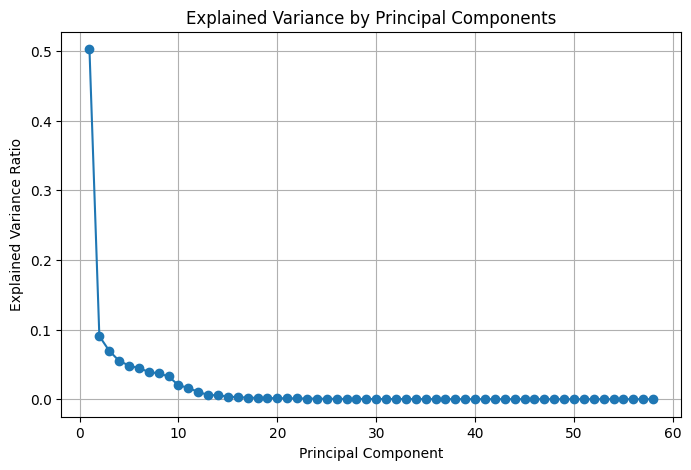

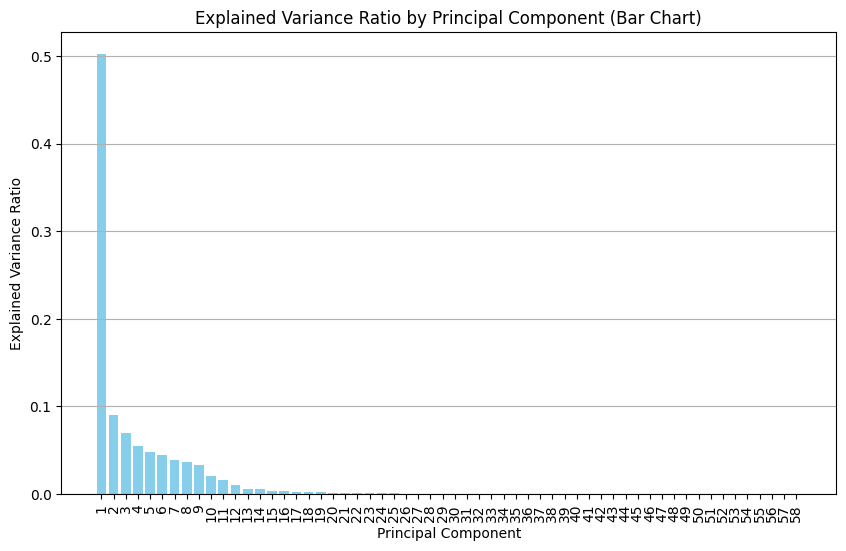

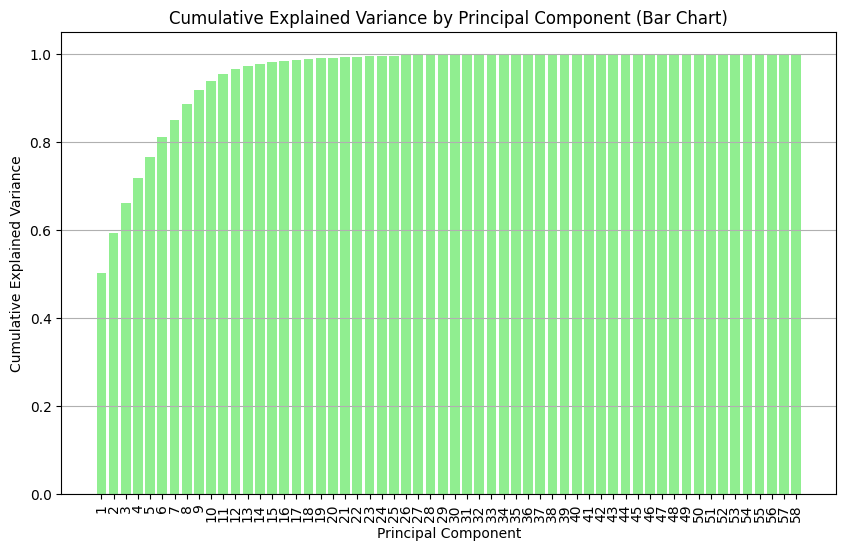

'PC11'

In [317]:
# Perform PCA on season_averages_qb_df
qb_pca_df, qb_pca = perform_pca_on_pos(season_averages_qb_df, neg_impact_col=off_neg_impact_cols, cols_to_skip=9, neg_impact_weight=1.0)
create_pca_visuals(qb_pca)
ranked_qb_df, qb_pca_range = create_pca_based_rank(qb_pca_df, qb_pca, season_averages_qb_df)
# Get last value of PCA range
qb_pca_range[-1]

In [318]:
# Show the top 30 ranked quarterbacks by PCA-based rank, first 7 columns and last 4 columns
ranked_qb_df.sort_values('pca_based_rank').iloc[:, [*range(7), -4, -3, -2, -1]].head(30)

,player_id,player_name,player_display_name,position,season,team,games_played,pca_based_rank,pca_mean,pca_mean_percentile,grade
765,00-0037013,Z.Wilson,Zach Wilson,QB,2022,NYJ,9.0,1.0,5.767093,100.00,A+
231,00-0027973,A.Dalton,Andy Dalton,QB,2014,CIN,14.0,2.0,4.463657,99.88,A+
639,00-0034857,J.Allen,Josh Allen,QB,2020,BUF,16.0,3.0,3.691833,99.75,A+
282,00-0029263,R.Wilson,Russell Wilson,QB,2016,SEA,16.0,4.0,3.289303,99.63,A+
521,00-0033106,J.Goff,Jared Goff,QB,2024,DET,17.0,5.0,2.903592,99.51,A+
700,00-0035710,D.Jones,Daniel Jones,QB,2021,NYG,11.0,6.0,2.603708,99.39,A+
427,00-0031407,B.Bortles,Blake Bortles,QB,2016,JAX,16.0,7.0,2.546520,99.26,A+
811,00-0039732,B.Nix,Bo Nix,QB,2024,DEN,16.0,8.0,2.531162,99.14,A+
629,00-0034855,B.Mayfield,Baker Mayfield,QB,2018,CLE,13.0,9.0,2.422559,99.02,A+
506,00-0033077,D.Prescott,Dak Prescott,QB,2021,DAL,16.0,10.0,2.355663,98.90,A+


### RB PCA

In [319]:
season_averages_rb_df.head()

,player_id,player_name,player_display_name,position,season,team,games_played,age,years_exp,passing_yards_r_avg_3_lag_1,...,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,fantasy_points
0,00-0022736,S.Jackson,Steven Jackson,RB,2014,ATL,13.0,31.0,10.0,0.0,...,7.856923,5.769231,7.421538,6.902308,6.748462,16.076923,14.916154,15.520769,15.656154,8.538462
1,00-0022736,S.Jackson,Steven Jackson,RB,2015,NE,2.0,32.0,11.0,0.0,...,5.440000,12.500000,5.500000,5.700000,5.440000,15.250000,18.085000,18.300000,17.875000,6.500000
2,00-0022999,J.Kuhn,John Kuhn,FB,2014,GB,10.0,32.0,9.0,0.0,...,1.866000,7.400000,8.034000,8.460000,7.870000,16.600000,14.651000,13.530000,14.127000,0.980000
3,00-0022999,J.Kuhn,John Kuhn,FB,2015,GB,12.0,33.0,10.0,0.0,...,1.613333,7.750000,6.875833,6.662500,6.426667,12.041667,14.895000,15.280833,15.744167,1.700000
4,00-0022999,J.Kuhn,John Kuhn,FB,2016,NO,13.0,34.0,11.0,0.0,...,3.408462,7.461538,7.217692,6.356154,6.419231,14.846154,14.256154,16.074615,15.820769,3.130769


In [320]:
season_averages_rb_df.columns

Index(['player_id', 'player_name', 'player_display_name', 'position', 'season',
       'team', 'games_played', 'age', 'years_exp',
       'passing_yards_r_avg_3_lag_1', 'passing_yards_r_avg_5_lag_1',
       'passing_yards_r_avg_8_lag_1', 'passing_tds_r_avg_5_lag_1',
       'passing_tds_r_avg_8_lag_1', 'rushing_yards_r_avg_1_lag_1',
       'rushing_yards_r_avg_3_lag_1', 'rushing_yards_r_avg_5_lag_1',
       'rushing_yards_r_avg_8_lag_1', 'rushing_tds_r_avg_1_lag_1',
       'rushing_tds_r_avg_3_lag_1', 'rushing_tds_r_avg_5_lag_1',
       'rushing_tds_r_avg_8_lag_1', 'rushing_fumbles_lost_r_avg_1_lag_1',
       'rushing_fumbles_lost_r_avg_3_lag_1',
       'rushing_fumbles_lost_r_avg_5_lag_1',
       'rushing_fumbles_lost_r_avg_8_lag_1',
       'rushing_2pt_conversions_r_avg_1_lag_1',
       'rushing_2pt_conversions_r_avg_3_lag_1',
       'rushing_2pt_conversions_r_avg_5_lag_1',
       'rushing_2pt_conversions_r_avg_8_lag_1',
       'receiving_yards_r_avg_1_lag_1', 'receiving_yards_r_avg_3

In [321]:
season_averages_rb_df = season_averages_rb_df.copy()

# Multiply columns 9 and beyond by value in column 'games_played' for games played impact
season_averages_rb_df.iloc[:, 9:] = season_averages_rb_df.iloc[:, 9:].multiply(season_averages_rb_df['games_played'], axis=0)

In [322]:
season_averages_rb_df.head()

,player_id,player_name,player_display_name,position,season,team,games_played,age,years_exp,passing_yards_r_avg_3_lag_1,...,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,fantasy_points
0,00-0022736,S.Jackson,Steven Jackson,RB,2014,ATL,13.0,31.0,10.0,0.0,...,102.14,75.0,96.48,89.73,87.73,209.0,193.91,201.77,203.53,111.0
1,00-0022736,S.Jackson,Steven Jackson,RB,2015,NE,2.0,32.0,11.0,0.0,...,10.88,25.0,11.00,11.40,10.88,30.5,36.17,36.60,35.75,13.0
2,00-0022999,J.Kuhn,John Kuhn,FB,2014,GB,10.0,32.0,9.0,0.0,...,18.66,74.0,80.34,84.60,78.70,166.0,146.51,135.30,141.27,9.8
3,00-0022999,J.Kuhn,John Kuhn,FB,2015,GB,12.0,33.0,10.0,0.0,...,19.36,93.0,82.51,79.95,77.12,144.5,178.74,183.37,188.93,20.4
4,00-0022999,J.Kuhn,John Kuhn,FB,2016,NO,13.0,34.0,11.0,0.0,...,44.31,97.0,93.83,82.63,83.45,193.0,185.33,208.97,205.67,40.7


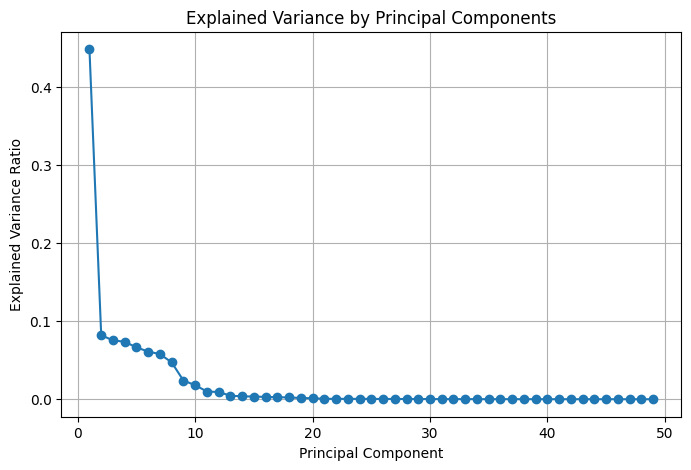

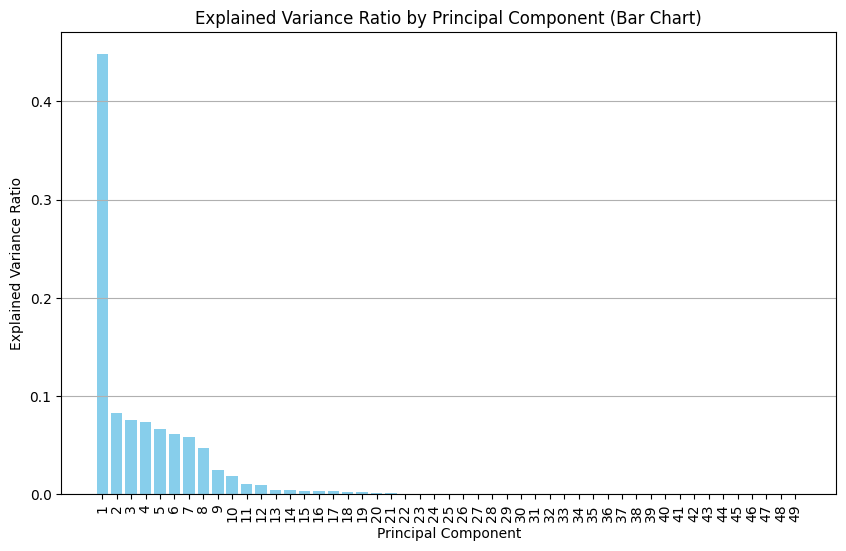

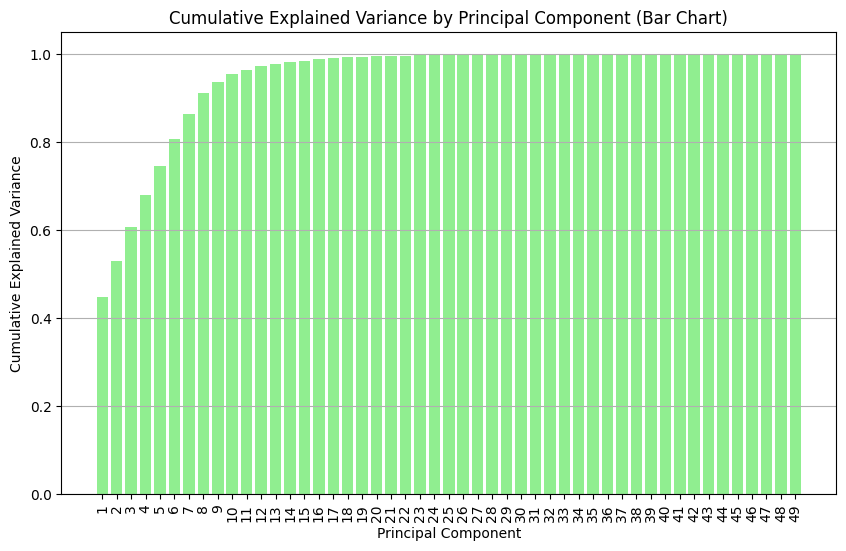

'PC10'

In [323]:
# Perform PCA on season_averages_rb_df
rb_pca_df, rb_pca = perform_pca_on_pos(season_averages_rb_df, neg_impact_col=off_neg_impact_cols, cols_to_skip=9, neg_impact_weight=1.0)
create_pca_visuals(rb_pca)
ranked_rb_df, rb_pca_range = create_pca_based_rank(rb_pca_df, rb_pca, season_averages_rb_df)
# Get last value of PCA range
rb_pca_range[-1]

In [324]:
# Show the top 30 ranked running backs by PCA-based rank, first 7 columns and last 4 columns
ranked_rb_df.sort_values('pca_based_rank').iloc[:, [*range(7), -4, -3, -2, -1]].head(30)

,player_id,player_name,player_display_name,position,season,team,games_played,pca_based_rank,pca_mean,pca_mean_percentile,grade
1072,00-0033553,J.Conner,James Conner,RB,2018,PIT,13.0,1.0,6.023285,100.00,A+
917,00-0032764,D.Henry,Derrick Henry,RB,2023,TEN,17.0,2.0,5.374652,99.95,A+
916,00-0032764,D.Henry,Derrick Henry,RB,2022,TEN,16.0,3.0,4.591641,99.89,A+
1364,00-0034844,S.Barkley,Saquon Barkley,RB,2022,NYG,16.0,4.0,4.570108,99.84,A+
1022,00-0033280,C.McCaffrey,Christian McCaffrey,RB,2022,SF,11.0,5.0,4.319067,99.79,A+
1703,00-0036875,R.Stevenson,Rhamondre Stevenson,RB,2024,NE,15.0,6.0,4.248015,99.74,A+
485,00-0030496,L.Bell,Le'Veon Bell,RB,2019,NYJ,15.0,7.0,4.179576,99.68,A+
1602,00-0036275,D.Swift,D'Andre Swift,RB,2024,CHI,17.0,8.0,4.161658,99.63,A+
192,00-0028009,D.Murray,DeMarco Murray,RB,2016,TEN,16.0,9.0,4.158546,99.58,A+
1136,00-0033893,D.Cook,Dalvin Cook,RB,2020,MIN,14.0,10.0,4.134176,99.52,A+


### WR PCA

In [325]:
season_averages_wr_df.head()

,player_id,player_name,player_display_name,position,season,team,games_played,age,years_exp,passing_yards_r_avg_1_lag_1,...,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,fantasy_points
0,00-0020337,S.Smith,Steve Smith,WR,2014,BAL,13.0,35.0,13.0,0.0,...,9.923846,7.076923,7.718462,7.215385,7.192308,15.115385,13.544615,14.566923,14.503846,8.623077
1,00-0020337,S.Smith,Steve Smith,WR,2015,BAL,7.0,36.0,14.0,0.0,...,10.054286,5.857143,4.880000,6.232857,5.694286,18.571429,18.940000,17.502857,18.245714,12.142857
2,00-0020337,S.Smith,Steve Smith,WR,2016,BAL,13.0,37.0,2.0,0.0,...,7.520769,4.538462,4.627692,4.626923,4.753077,17.653846,17.833846,18.244615,18.399231,8.500000
3,00-0020337,S.Smith Sr.,Steve Smith,WR,2014,BAL,1.0,35.0,13.0,0.0,...,12.290000,4.000000,1.000000,5.000000,5.500000,15.000000,24.670000,17.900000,16.500000,3.500000
4,00-0020337,S.Smith Sr.,Steve Smith,WR,2016,BAL,1.0,37.0,2.0,0.0,...,9.190000,3.000000,6.000000,6.400000,5.620000,6.500000,16.500000,14.600000,14.940000,3.400000


In [326]:
season_averages_wr_df = season_averages_wr_df.copy()

# Multiply columns 9 and beyond by value in column 'games_played' for games played impact
season_averages_wr_df.iloc[:, 9:] = season_averages_wr_df.iloc[:, 9:].multiply(season_averages_wr_df['games_played'], axis=0)

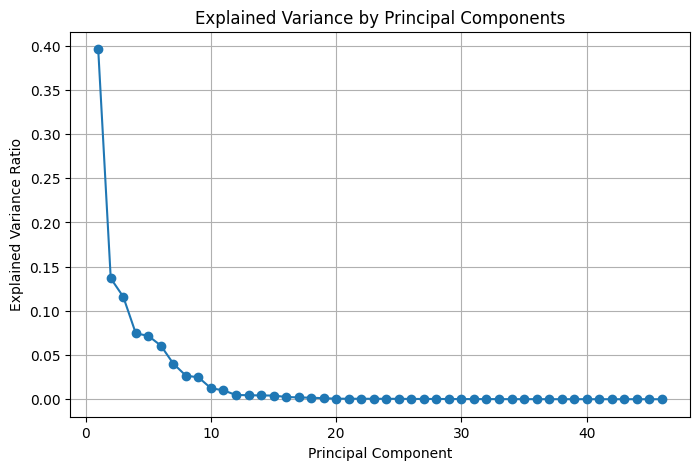

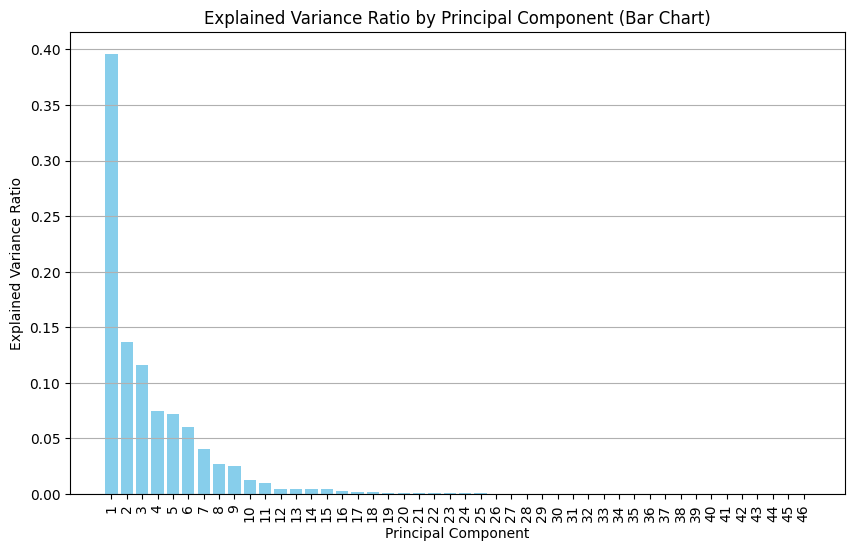

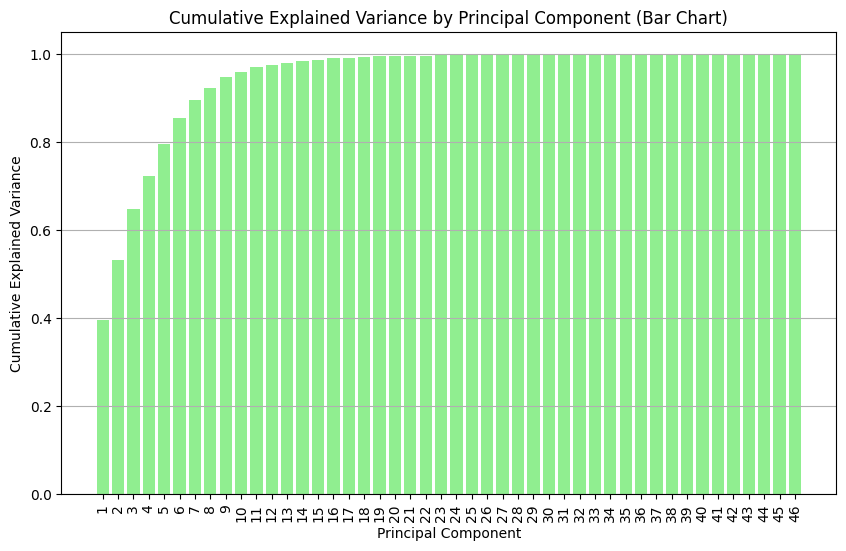

'PC10'

In [327]:
# Perform PCA on season_averages_wr_df
wr_pca_df, wr_pca = perform_pca_on_pos(season_averages_wr_df, neg_impact_col=off_neg_impact_cols, cols_to_skip=9, neg_impact_weight=1.0)
create_pca_visuals(wr_pca)
ranked_wr_df, wr_pca_range = create_pca_based_rank(wr_pca_df, wr_pca, season_averages_wr_df)
# Get last value of PCA range
wr_pca_range[-1]

In [328]:
# Show the top 30 ranked wide receivers by PCA-based rank, first 7 columns and last 4 columns
ranked_wr_df.sort_values('pca_based_rank').iloc[:, [*range(7), -4, -3, -2, -1]].head(30)

,player_id,player_name,player_display_name,position,season,team,games_played,pca_based_rank,pca_mean,pca_mean_percentile,grade
2032,00-0035719,D.Samuel,Deebo Samuel Sr.,WR,2022,SF,13.0,1.0,7.884716,100.00,A+
1383,00-0033282,C.Samuel,Curtis Samuel,WR,2022,WAS,17.0,2.0,5.417495,99.96,A+
2031,00-0035719,D.Samuel,Deebo Samuel Sr.,WR,2021,SF,16.0,3.0,5.209367,99.92,A+
660,00-0030525,T.Austin,Tavon Austin,WR,2015,LA,16.0,4.0,4.761917,99.88,A+
239,00-0027793,A.Brown,Antonio Brown,WR,2014,PIT,14.0,5.0,4.687297,99.84,A+
502,00-0029632,M.Sanu,Mohamed Sanu,WR,2014,CIN,14.0,6.0,4.580315,99.80,A+
615,00-0030279,K.Allen,Keenan Allen,WR,2023,LAC,13.0,7.0,4.496871,99.76,A+
2305,00-0036963,A.St. Brown,Amon-Ra St. Brown,WR,2024,DET,17.0,8.0,4.409490,99.72,A+
1709,00-0034419,B.Berrios,Braxton Berrios,WR,2022,NYJ,17.0,9.0,4.201153,99.68,A+
1400,00-0033307,K.Bourne,Kendrick Bourne,WR,2021,NE,17.0,10.0,3.960444,99.65,A+


### TE PCA

In [329]:
season_averages_te_df.head()

,player_id,player_name,player_display_name,position,season,team,games_played,age,years_exp,passing_yards_r_avg_1_lag_1,...,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,opp_team_dst_fp_rank_r_avg_3_lag_1,opp_team_dst_fp_rank_r_avg_5_lag_1,opp_team_dst_fp_rank_r_avg_8_lag_1,fantasy_points
0,00-0021547,A.Gates,Antonio Gates,TE,2014,LAC,14.0,34.0,11.0,0.0,...,10.410714,8.142857,7.035000,6.917857,6.547857,14.821429,15.250714,15.085714,15.339286,8.457143
1,00-0021547,A.Gates,Antonio Gates,TE,2015,LAC,11.0,35.0,12.0,0.0,...,10.782727,8.454545,7.818182,7.931818,7.135455,12.818182,13.349091,13.381818,14.605455,8.454545
2,00-0021547,A.Gates,Antonio Gates,TE,2016,LAC,13.0,36.0,13.0,0.0,...,5.849231,6.923077,7.128462,7.092308,6.823077,14.769231,14.178462,14.152308,14.833846,7.292308
3,00-0021547,A.Gates,Antonio Gates,TE,2017,LAC,16.0,37.0,14.0,0.0,...,2.880625,4.250000,4.593750,5.981250,5.936250,17.937500,18.332500,16.431250,16.634375,3.100000
4,00-0021547,A.Gates,Antonio Gates,TE,2018,LAC,16.0,38.0,15.0,0.0,...,3.192500,4.750000,6.063125,6.529375,6.073125,17.781250,16.110625,15.113750,16.150625,2.956250


In [330]:
season_averages_te_df = season_averages_te_df.copy()

# Multiply columns 9 and beyond by value in column 'games_played' for games played impact
season_averages_te_df.iloc[:, 9:] = season_averages_te_df.iloc[:, 9:].multiply(season_averages_te_df['games_played'], axis=0)

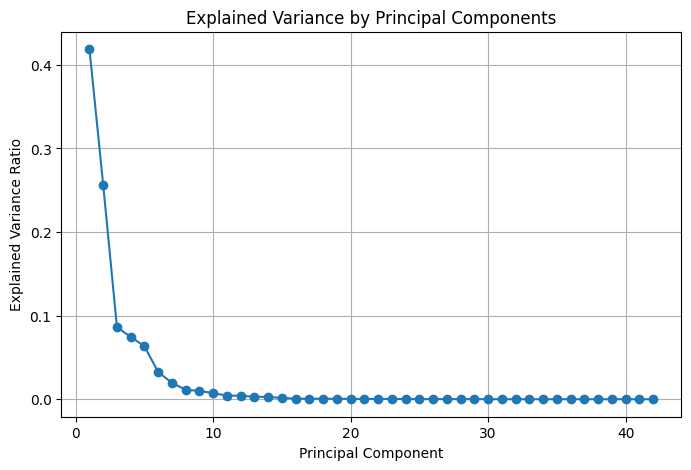

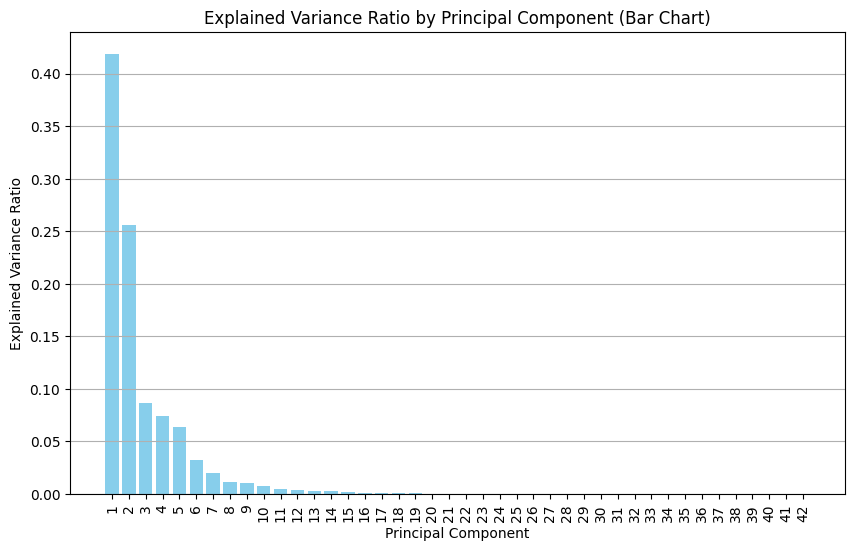

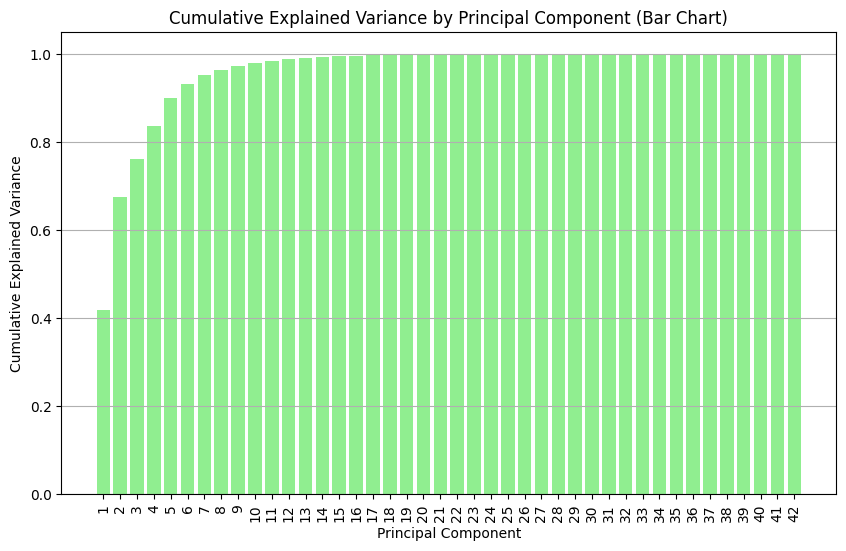

'PC7'

In [331]:
# Perform PCA on season_averages_te_df
te_pca_df, te_pca = perform_pca_on_pos(season_averages_te_df, neg_impact_col=off_neg_impact_cols, cols_to_skip=9, neg_impact_weight=1.0)
create_pca_visuals(te_pca)
ranked_te_df, te_pca_range = create_pca_based_rank(te_pca_df, te_pca, season_averages_te_df)
# Get last value of PCA range
te_pca_range[-1]

In [332]:
# Show the top 30 ranked tight ends by PCA-based rank, first 7 columns and last 4 columns
ranked_te_df.sort_values('pca_based_rank').iloc[:, [*range(7), -4, -3, -2, -1]].head(30)

,player_id,player_name,player_display_name,position,season,team,games_played,pca_based_rank,pca_mean,pca_mean_percentile,grade
797,00-0033357,T.Hill,Taysom Hill,TE,2020,NO,16.0,1.0,16.319740,100.00,A+
798,00-0033357,T.Hill,Taysom Hill,TE,2021,NO,12.0,2.0,10.132574,99.93,A+
799,00-0033357,T.Hill,Taysom Hill,TE,2022,NO,16.0,3.0,8.252660,99.85,A+
4,00-0021547,A.Gates,Antonio Gates,TE,2018,LAC,16.0,4.0,4.649616,99.78,A+
800,00-0033357,T.Hill,Taysom Hill,TE,2023,NO,16.0,5.0,4.362734,99.70,A+
406,00-0030506,T.Kelce,Travis Kelce,TE,2015,KC,16.0,6.0,4.097455,99.63,A+
335,00-0030061,Z.Ertz,Zach Ertz,TE,2022,ARI,10.0,7.0,4.080936,99.56,A+
337,00-0030061,Z.Ertz,Zach Ertz,TE,2024,WAS,17.0,8.0,3.396534,99.48,A+
1331,00-0039065,S.LaPorta,Sam LaPorta,TE,2023,DET,16.0,9.0,3.395195,99.41,A+
988,00-0034753,M.Andrews,Mark Andrews,TE,2021,BAL,17.0,10.0,3.318778,99.34,A+


## Supervised ML Models

In [338]:
# Sanity Check - qb_rolling_df, 'player_name' = T.Brady, 'season' = 2021
t_brady_2021 = qb_df_cleaned[(qb_df_cleaned['player_name'] == 'T.Brady') & (qb_df_cleaned['season'] == 2021)]
# t_brady_2021.iloc[:, list(range(-15, 0))]

# pivot table to see all rolling averages for T.Brady in 2021
t_brady_2021_pivot = t_brady_2021.pivot_table(index=['week'], values=[col for col in t_brady_2021.columns if 'r_' in col or 'fantasy_points' in col], aggfunc='first')
t_brady_2021_pivot

,fantasy_points,fantasy_points_r_avg_1_lag_1,fantasy_points_r_avg_3_lag_1,fantasy_points_r_avg_5_lag_1,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,...,rushing_tds_r_avg_5_lag_1,rushing_tds_r_avg_8_lag_1,rushing_yards_r_avg_1_lag_1,rushing_yards_r_avg_3_lag_1,rushing_yards_r_avg_5_lag_1,rushing_yards_r_avg_8_lag_1,sack_fumbles_lost_r_avg_1_lag_1,sack_fumbles_lost_r_avg_3_lag_1,sack_fumbles_lost_r_avg_5_lag_1,sack_fumbles_lost_r_avg_8_lag_1
week,,,,,,,,,,,,,,,,,,,,,
1,27.16,30.26,27.86,24.18,20.97,5.0,10.33,9.80,7.25,12.0,...,0.00,0.12,3.0,0.33,-0.40,0.00,0.0,0.00,0.00,0.00
2,29.64,27.16,27.16,27.16,27.16,6.0,0.00,0.00,0.00,29.5,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
3,28.68,29.64,28.40,28.40,28.40,0.0,7.50,7.50,7.50,13.0,...,0.00,0.00,6.0,3.00,3.00,3.00,1.0,0.50,0.50,0.50
4,11.06,28.68,28.49,28.49,28.49,7.0,7.67,7.67,7.67,26.5,...,0.33,0.33,14.0,6.67,6.67,6.67,0.0,0.33,0.33,0.33
5,37.74,11.06,23.13,24.14,24.14,2.0,5.33,5.25,5.25,15.0,...,0.25,0.25,3.0,7.67,5.75,5.75,0.0,0.33,0.25,0.25
6,17.98,37.74,25.83,26.86,26.86,4.0,6.00,5.20,5.20,4.5,...,0.20,0.20,13.0,10.00,7.20,7.20,0.0,0.00,0.20,0.20
7,24.44,17.98,22.26,25.02,25.38,9.0,6.67,9.00,7.50,19.0,...,0.20,0.17,1.0,5.67,7.40,6.17,0.0,0.00,0.20,0.17
8,25.20,24.44,26.72,23.98,25.24,3.0,5.33,7.80,8.50,7.5,...,0.20,0.14,0.0,4.67,6.20,5.29,0.0,0.00,0.00,0.14
10,13.00,25.20,22.54,23.28,25.24,8.0,7.33,6.60,4.62,12.5,...,0.00,0.12,2.0,1.00,3.80,4.88,1.0,0.33,0.20,0.25


In [341]:
# Get Tom Brady 2022 data
t_brady_2022 = qb_df_cleaned[(qb_df_cleaned['player_name'] == 'T.Brady') & (qb_df_cleaned['season'] == 2022)]

# pivot table to see all rolling averages for T.Brady in 2022
t_brady_2022_pivot = t_brady_2022.pivot_table(index=['week'], values=[col for col in t_brady_2022.columns if 'r_' in col or 'fantasy_points' in col], aggfunc='first')
t_brady_2022_pivot

,fantasy_points,fantasy_points_r_avg_1_lag_1,fantasy_points_r_avg_3_lag_1,fantasy_points_r_avg_5_lag_1,fantasy_points_r_avg_8_lag_1,opp_team_dst_fp_r_avg_1_lag_1_lag_1,opp_team_dst_fp_r_avg_3_lag_1,opp_team_dst_fp_r_avg_5_lag_1,opp_team_dst_fp_r_avg_8_lag_1,opp_team_dst_fp_rank_r_avg_1_lag_1,...,rushing_tds_r_avg_5_lag_1,rushing_tds_r_avg_8_lag_1,rushing_yards_r_avg_1_lag_1,rushing_yards_r_avg_3_lag_1,rushing_yards_r_avg_5_lag_1,rushing_yards_r_avg_8_lag_1,sack_fumbles_lost_r_avg_1_lag_1,sack_fumbles_lost_r_avg_3_lag_1,sack_fumbles_lost_r_avg_5_lag_1,sack_fumbles_lost_r_avg_8_lag_1
week,,,,,,,,,,,,,,,,,,,,,
1,10.38,25.04,21.94,20.14,19.98,2.0,9.33,12.40,11.50,17.5,...,0.2,0.12,0.0,3.67,5.80,5.00,0.0,0.00,0.00,0.00
2,9.40,10.38,10.38,10.38,10.38,5.0,6.00,6.00,6.00,14.5,...,0.0,0.00,-1.0,-1.00,-1.00,-1.00,0.0,0.00,0.00,0.00
3,14.74,9.40,9.89,9.89,9.89,6.0,4.50,4.50,4.50,13.0,...,0.0,0.00,-2.0,-1.50,-1.50,-1.50,0.0,0.00,0.00,0.00
4,25.40,14.74,11.51,11.51,11.51,8.0,6.67,6.67,6.67,13.0,...,0.0,0.00,-1.0,-1.33,-1.33,-1.33,0.0,0.00,0.00,0.00
5,19.74,25.40,16.51,14.98,14.98,7.0,7.67,7.25,7.25,19.5,...,0.0,0.00,0.0,-1.00,-1.00,-1.00,1.0,0.33,0.25,0.25
6,13.72,19.74,19.96,15.93,15.93,5.0,3.00,7.40,7.40,20.0,...,0.0,0.00,-3.0,-1.33,-1.40,-1.40,0.0,0.33,0.20,0.20
7,11.70,13.72,19.62,16.60,15.56,3.0,7.00,8.00,6.83,8.0,...,0.0,0.00,0.0,-1.00,-1.20,-1.17,0.0,0.33,0.20,0.17
8,17.10,11.70,15.05,17.06,15.01,9.0,7.67,7.80,8.14,5.5,...,0.0,0.00,1.0,-0.67,-0.60,-0.86,0.0,0.00,0.20,0.14
9,15.20,17.10,14.17,17.53,15.27,11.0,4.00,3.40,5.00,26.0,...,0.0,0.00,1.0,0.67,-0.20,-0.62,0.0,0.00,0.20,0.12


In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Simple approach: Train/test split on 2021 data, then predict 2022
print(f"2021 data shape: {t_brady_2021_pivot.shape}")
print(f"2022 data shape: {t_brady_2022_pivot.shape}")

# Separate features and target for 2021
feature_cols_2021 = [col for col in t_brady_2021_pivot.columns if col != 'fantasy_points']

X_2021 = t_brady_2021_pivot[feature_cols_2021]
y_2021 = t_brady_2021_pivot['fantasy_points']

# Simple train/test split on 2021 data
X_train, X_test, y_train, y_test = train_test_split(
    X_2021, y_2021, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# Train the model on 2021 data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on 2021 test set
predictions_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print(f"Test MSE (2021 data): {mse_test:.4f}")
print(f"Test R² Score (2021 data): {r2_test:.4f}")

# Now make predictions for 2022 using the trained model
X_2022 = t_brady_2022_pivot[feature_cols_2021]
predictions_2022 = model.predict(X_2022.fillna(0))
predictions_2022 = np.round(predictions_2022, 2)

y_2022_actual = t_brady_2022_pivot['fantasy_points']

actual_mean_2022 = np.mean(y_2022_actual).round(2)
prediction_mean_2022 = np.mean(predictions_2022).round(2)

# Compare predictions vs actual for 2022
print(f"\nMean of predictions (2022): {prediction_mean_2022}")
print(f"Mean of actual values (2022): {actual_mean_2022}")

# Evaluate 2022 predictions against actual 2022 performance
mse_2022 = mean_squared_error(y_2022_actual, predictions_2022)
r2_2022 = r2_score(y_2022_actual, predictions_2022)

print(f"Mean Squared Error (2022): {mse_2022:.4f}")
print(f"R² Score (2022): {r2_2022:.4f}")

# Create a DataFrame to compare actual vs predicted for 2022
comparison_df_2022 = pd.DataFrame({
    'Week': t_brady_2022_pivot.index,
    'Actual': y_2022_actual.values,
    'Predicted': predictions_2022
})

print("\nActual vs Predicted fantasy_points(LR) (2022):")
print(comparison_df_2022)

2021 data shape: (17, 61)
2022 data shape: (17, 61)
Training samples: 13
Test samples: 4


ValueError: could not convert string to float: 'Tom Brady'

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Simple approach: Train/test split on 2021 data, then predict 2022
print(f"2021 data shape: {t_brady_2021_pivot.shape}")
print(f"2022 data shape: {t_brady_2022_pivot.shape}")

# Separate features and target for 2021
feature_cols_2021 = [col for col in t_brady_2021_pivot.columns if col != 'fantasy_points_r_avg_1']

X_2021 = t_brady_2021_pivot[feature_cols_2021]
y_2021 = t_brady_2021_pivot['fantasy_points_r_avg_1']

# Simple train/test split on 2021 data
X_train, X_test, y_train, y_test = train_test_split(
    X_2021, y_2021, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# Train the model on 2021 data
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=00.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate on 2021 test set
predictions_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print(f"Test MSE (2021 data): {mse_test:.4f}")
print(f"Test R² Score (2021 data): {r2_test:.4f}")

# Now make predictions for 2022 using the trained model using 1-week lag features
# Shift the 2022 data to create a 1-week lag
X_2022 = t_brady_2022_pivot[feature_cols_2021].shift(1)
predictions_2022 = model.predict(X_2022.fillna(0))
predictions_2022 = np.round(predictions_2022, 2)

y_2022_actual = t_brady_2022_pivot['fantasy_points_r_avg_1']

actual_mean_2022 = np.mean(y_2022_actual).round(2)
prediction_mean_2022 = np.mean(predictions_2022).round(2)

# Compare predictions vs actual for 2022
print(f"\nMean of predictions (2022): {prediction_mean_2022}")
print(f"Mean of actual values (2022): {actual_mean_2022}")

# Evaluate 2022 predictions against actual 2022 performance
mse_2022 = mean_squared_error(y_2022_actual, predictions_2022)
r2_2022 = r2_score(y_2022_actual, predictions_2022)

print(f"Mean Squared Error (2022): {mse_2022:.4f}")
print(f"R² Score (2022): {r2_2022:.4f}")

# Create a DataFrame to compare actual vs predicted for 2022
comparison_df_2022 = pd.DataFrame({
    'Week': t_brady_2022_pivot.index,
    'Actual': y_2022_actual.values,
    'Predicted': predictions_2022
})

print("\nActual vs Predicted fantasy_points(XGB) (2022):")
print(comparison_df_2022)

2021 data shape: (17, 53)
2022 data shape: (17, 53)
Training samples: 13
Test samples: 4
Test MSE (2021 data): 4.9589
Test R² Score (2021 data): 0.7427

Mean of predictions (2022): 14.960000038146973
Mean of actual values (2022): 15.98
Mean Squared Error (2022): 102.4689
R² Score (2022): -1.1469

Actual vs Predicted fantasy_points(XGB) (2022):
    Week  Actual  Predicted
0      1   10.38   6.190000
1      2    9.40  11.600000
2      3   14.74  11.600000
3      4   25.40   9.520000
4      5   19.74  24.799999
5      6   13.72  33.580002
6      7   11.70  13.480000
7      8   17.10   9.990000
8      9   15.20  14.130000
9     10   16.02  13.130000
10    12   18.04  12.940000
11    13   17.14  12.980000
12    14   10.12  12.930000
13    15   16.58   9.170000
14    16   11.34  16.680000
15    17   37.68  15.570000
16    18    7.36  26.090000


## 2025 Predictions

In [ ]:
# Load player game-level stats for 2025 season to identify current rosters
# player_stats_2025 = nfl.load_player_stats(2025)
# player_stats_pandas_2025 = player_stats_2025.to_pandas()
# player_stats_pandas_2025 = player_stats_pandas_2025[player_stats_pandas_2025['season_type'] != 'POST']
# player_stats_pandas_2025

In [ ]:
# Create Complete Team Defense Dataframes
# def create_team_defense_df(complete_data_df):
#     # Filter for defensive positions
#     defensive_positions = ['DL', 'LB', 'DB']
#     team_defense_df = complete_data_df[complete_data_df['pos_abb'].isin(defensive_positions)].copy()
    
#     return team_defense_df

# team_defense_df = create_team_defense_df(complete_data_df)
# team_defense_df.columns